# Company Financials Dataset

Este conjunto de datos es un archivo que representa un resumen de ventas y beneficios por mercado, país/región, producto y otros factores clave. 

A continuación se presenta un desglose detallado de cada columna: 

* **Segment**: Representa el segmento de mercado (*e.g., Government, Midmarket, Enterprise*). Sirve para identificar la contribución de cada segmento al total de las ventas y beneficios.
* **Country**: Es el país o región donde se realizaron las ventas. Permite localizar los mercados más fuertes geográficamente.
* **Product**: El tipo de producto vendido (*e.g., Carretera, Montana, Paseo*). Esto ayuda a analizar qué productos son los más populares y rentables.
* **Discount Band**: Representa el nivel de descuento aplicado. En este caso, parece que todos los descuentos son "None", lo que indica que no hubo descuentos aplicados directamente.
* **Units Sold**: El número de unidades vendidas. Es un factor clave para calcular las métricas de ventas y beneficios.
* **Manufacturing Price**: El costo de fabricación por unidad del producto. Sirve para calcular márgenes de ganancia.
* **Sale Price**: El precio de venta por unidad. Refleja la estrategia de precios de la empresa.
* **Gross Sales**: Ingresos brutos generados antes de aplicar descuentos. Calculado como:

        Gross Sales = Units Sold x Sale Price

* **Discounts**: Los descuentos totales aplicados. En este dataset aparecen como $-, lo que implica que no hubo descuentos registrados.
* **Sales**: Ventas netas, después de descuentos. En este caso, como no hay descuentos, **Gross Sales = Sales**.
* **COGS** (Cost of Goods Sold): El costo de los bienes vendidos. Calculado como:

        COGS = Units Sold x Manufacturing Price

* **Profit**: La ganancia neta obtenida. Calculada como:

        Profit = Sales - COGS

* **Date, Month Number, Month Name, Year**: Información temporal que detalla cuándo se realizó la venta. Esto es útil para identificar tendencias estacionales y patrones de compra.

## Lectura de Datos

In [95]:
# pip install pandas matplotlib seaborn plotly geopandas folium


In [96]:
import csv as csv
from statistics import mean
import pandas as pd

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium

In [98]:
datos_df = pd.read_csv('./data/Financials.csv')
datos_df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [99]:
from IPython.display import display
display(datos_df)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


### Información general y descripción estadística

In [100]:
#Column type
datos_df.dtypes

Segment                  object
Country                  object
 Product                 object
 Discount Band           object
 Units Sold              object
 Manufacturing Price     object
 Sale Price              object
 Gross Sales             object
 Discounts               object
  Sales                  object
 COGS                    object
 Profit                  object
Date                     object
Month Number              int64
 Month Name              object
Year                      int64
dtype: object

Como puede observase existen numerosos valores tipo 'object' que mas adelante pasarán a ser 'float' para facilitar el análisis. 

In [101]:
print(datos_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [102]:
datos_df.describe()

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [103]:

datos_df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

No existe ningún valor nulo o faltante en nuestro CSV. 


## Preprocesamiento

### Limpieza de Datos

Se comenzará el preprocesamiento de los datos con una limpieza básica de ellos. El primer paso será modificar el nombre de las columnas para después detectar la existencia de valores nulos en el conjunto de datos:

In [104]:
datos_df = datos_df.rename(columns = {
    'Segment': 'segment',
    'Country': 'country',
    ' Product ': 'product',
    ' Discount Band ': 'discount_band',
    ' Units Sold ': 'units_sold',
    ' Manufacturing Price ': 'manufacturing_price',
    ' Sale Price ': 'sale_price',
    ' Gross Sales ': 'gross_sales',
    ' Discounts ': 'discounts',
    '  Sales ': 'sales',
    ' COGS ': 'cogs',
    ' Profit ': 'profit',
    'Date': 'date',
    'Month Number': 'month_number',
    ' Month Name ': 'month_name',
    'Year': 'year'
})



A continuación se muestra una fila completa del conjutno de datos:

Midmarket,France, Paseo , None , $549.00 , $10.00 , $15.00 ," $8,235.00 ", $-   ," $8,235.00 "," $5,490.00 "," $2,745.00 ",01/09/2013,9, September ,2013

Como puede observarse, existen carácteres especiales que han de ser eliminados del dataset para poder trabajar de forma correcta con los datos, además, el valor de la cuarta columna, en muchos ejemplos toma valor "none", valor que habrá que estudiar más adelante.

Se muestra entonces, punto por punto, los pasos a seguir hasta dar con un dataset completamente funcional:



#### Eliminar espacios en blanco de las columnas.

In [105]:
datos_df.columns = datos_df.columns.str.strip()
datos_df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

#### Identificar y limpiar columnas numéricas

In [106]:
numeric_columns = [
    'units_sold', 'manufacturing_price', 'sale_price',
    'gross_sales', 'discounts', 'sales', 'cogs', 'profit'
]

Recordemos los valores que toman dichas columnas numéricas:


In [107]:
print(datos_df[numeric_columns])

      units_sold manufacturing_price sale_price     gross_sales  \
0     $1,618.50               $3.00     $20.00      $32,370.00    
1     $1,321.00               $3.00     $20.00      $26,420.00    
2     $2,178.00               $3.00     $15.00      $32,670.00    
3       $888.00               $3.00     $15.00      $13,320.00    
4     $2,470.00               $3.00     $15.00      $37,050.00    
..           ...                 ...        ...             ...   
695   $2,475.00             $260.00    $300.00    $7,42,500.00    
696     $546.00             $260.00    $300.00    $1,63,800.00    
697   $1,368.00               $5.00      $7.00       $9,576.00    
698     $723.00              $10.00      $7.00       $5,061.00    
699   $1,806.00             $250.00     $12.00      $21,672.00    

          discounts           sales            cogs        profit  
0             $-        $32,370.00      $16,185.00    $16,185.00   
1             $-        $26,420.00      $13,210.00    $13,2

A simple vista puede observarse que existen carácteres como "$", ",", "/" o espacios que serán eliminados a continuación.

Además limpiaremos también los valores de las columnas.


In [108]:
for col in numeric_columns:
    datos_df[col] = (
        datos_df[col]
        .astype(str)
        .str.replace(',', '', regex=False)       # Eliminar comas
        .str.replace(r'\(|\)', '', regex=True)  # Eliminar paréntesis
        .str.replace(r'\$', '', regex=True)     # Eliminar signos de dólar
        .str.replace('-', '0', regex=False)     # Reemplazar guiones con ceros
        .str.strip()                            # Eliminar espacios
        .astype(float)                          # Convertir a flotante
    )

for col in datos_df.select_dtypes(include='object').columns:
    datos_df[col] = datos_df[col].str.strip()

In [109]:
print(datos_df)

              segment                   country    product discount_band  \
0          Government                    Canada  Carretera          None   
1          Government                   Germany  Carretera          None   
2           Midmarket                    France  Carretera          None   
3           Midmarket                   Germany  Carretera          None   
4           Midmarket                    Mexico  Carretera          None   
..                ...                       ...        ...           ...   
695    Small Business                    France   Amarilla          High   
696    Small Business                    Mexico   Amarilla          High   
697        Government                    Mexico    Montana          High   
698        Government                    Canada      Paseo          High   
699  Channel Partners  United States of America        VTT          High   

     units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
0        16

El segundo paso entonces será asegurarnos de que la fecha está en un formato correcto:

In [110]:
datos_df['date'] = pd.to_datetime(datos_df['date'], format='%d/%m/%Y')

In [111]:
print(datos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
 13  month_number         700 non-null  

#### Reemplazo de valores en 'product' para mejorar el análisis y entendimiento del proyecto

Debido a que los productos de la columna 'product' resultan complicados de interpretar, se ha optado por hacer una permuta de ellos. Teniendo en cuenta el precio de producción y el precio de venta de cada uno de ellos, se ha llegado al siguiente acuerdo: 

1. **Amarilla** pasará a ser un **Teclado inalámbrico compacto**
Manufacturing Price: 260 USD
Descripción: Amarilla es un teclado inalámbrico compacto y ergonómico, diseñado para usuarios que buscan una experiencia de escritura fluida y cómoda. Con un diseño minimalista y teclas silenciosas, este teclado es perfecto para profesionales que necesitan un dispositivo confiable tanto en la oficina como en casa. La conectividad Bluetooth permite usarlo con una amplia variedad de dispositivos, incluyendo laptops, tablets y teléfonos móviles.

Razonamiento: Con un precio de fabricación elevado, este teclado combina características premium como la retroiluminación ajustable y la ergonomía avanzada, lo que lo convierte en la opción ideal para usuarios exigentes que valoran la comodidad y la funcionalidad en su equipo de trabajo.

2. **Carretera** pasará a ser un **Altavoz Bluetooth portátil básico**
Manufacturing Price: 3 USD
Descripción: Carretera es un altavoz Bluetooth compacto y económico perfecto para reproducir música o realizar llamadas mientras viajas. Ideal para escuchar en el auto, en el parque o en cualquier espacio al aire libre.

Razonamiento: Un producto sencillo, económico y funcional, diseñado para usuarios que buscan un altavoz básico sin muchas complicaciones.

3. **Montana** pasará a ser un **Termómetro de cocina digital**
Manufacturing Price: 5 USD
Descripción: Montana es un termómetro de cocina digital diseñado para medir la temperatura de alimentos con rapidez y precisión. Es ideal para quienes buscan mantener una alimentación saludable y cocinar con exactitud.

Razonamiento: Dispositivo básico y de bajo costo, pero muy útil para aficionados de la cocina y la comida saludable.

4. **Paseo** pasará a ser una **Pulsera de actividad fitness básica**
Manufacturing Price: 10 USD
Descripción: Paseo es una pulsera de actividad básica que rastrea pasos, distancia recorrida y calidad de sueño. Ideal para quienes buscan monitorear su actividad diaria sin complicaciones.

Razonamiento: Este producto ofrece funcionalidad básica con un precio asequible, adecuado para usuarios principiantes en la tecnología de salud.

5. **VTT** pasará a ser una **Cámara de seguridad IP básica**
Manufacturing Price: 250 USD
Descripción: VTT es una cámara de seguridad IP con visión nocturna y grabación en alta definición. Perfecta para proteger el hogar, oficina o negocio, fácil de instalar y controlar a través de una aplicación.

Razonamiento: Cámara de seguridad con buen precio y prestaciones básicas, adecuada para uso doméstico.

6. **Velo** pasará a ser un **Smartwatch económico**
Manufacturing Price: 120 USD
Descripción: Velo es un smartwatch básico que ofrece seguimiento de actividad física, notificaciones de mensajes y llamadas, y funciones de monitoreo de salud como frecuencia cardíaca y calidad del sueño.

Razonamiento: Un reloj inteligente accesible y funcional, ideal para aquellos que buscan lo esencial sin pagar por funciones avanzadas.



In [112]:

# Crear el diccionario de reemplazo
reemplazos = {
    "Amarilla": "teclado",
    "Carretera": "altavoz",
    "Montana": "termometro",
    "Paseo": "pulsera",
    "VTT": "camara",
    "Velo": "smartwatch"
}

# Aplicar los reemplazos en la columna 'product'
datos_df['product'] = datos_df['product'].str.strip().replace(reemplazos)

# Verificar los cambios únicos en la columna 'product'
print("Valores únicos actualizados en 'product':")
print(datos_df['product'].unique())

# Mostrar las primeras filas del DataFrame actualizado
print("\nDataFrame actualizado:")
print(datos_df.head())


Valores únicos actualizados en 'product':
['altavoz' 'termometro' 'pulsera' 'smartwatch' 'camara' 'teclado']

DataFrame actualizado:
      segment  country  product discount_band  units_sold  \
0  Government   Canada  altavoz          None      1618.5   
1  Government  Germany  altavoz          None      1321.0   
2   Midmarket   France  altavoz          None      2178.0   
3   Midmarket  Germany  altavoz          None       888.0   
4   Midmarket   Mexico  altavoz          None      2470.0   

   manufacturing_price  sale_price  gross_sales  discounts    sales     cogs  \
0                  3.0        20.0      32370.0        0.0  32370.0  16185.0   
1                  3.0        20.0      26420.0        0.0  26420.0  13210.0   
2                  3.0        15.0      32670.0        0.0  32670.0  21780.0   
3                  3.0        15.0      13320.0        0.0  13320.0   8880.0   
4                  3.0        15.0      37050.0        0.0  37050.0  24700.0   

    profit       da

A continuación se muestra una tabla resumen de los cambios realizados:
"Amarilla": "teclado",
    "Carretera": "altavoz",
    "Montana": "termometro",
    "Paseo": "pulsera",
    "VTT": "camara",
    "Velo": "smartwatch"

| Producto Inicial | Producto definitivo
|----------|----------
|Amarilla    | teclado   
| Carretera    | altavoz   
| Montana    | termometro
| Paseo    | pulsera
| VTT    | camara
| Velo    | smartwatch   

#### Verificación de cambios

In [113]:
# Validar tipos de datos después del preprocesamiento
print("\nTipos de datos después del preprocesamiento:")
print(datos_df.dtypes)

# Verificar valores únicos en columnas clave
print("\nValores únicos en 'product':")
print(datos_df['product'].unique())
print("\nValores únicos en 'discount_band':")
print(datos_df['discount_band'].unique())



Tipos de datos después del preprocesamiento:
segment                        object
country                        object
product                        object
discount_band                  object
units_sold                    float64
manufacturing_price           float64
sale_price                    float64
gross_sales                   float64
discounts                     float64
sales                         float64
cogs                          float64
profit                        float64
date                   datetime64[ns]
month_number                    int64
month_name                     object
year                            int64
dtype: object

Valores únicos en 'product':
['altavoz' 'termometro' 'pulsera' 'smartwatch' 'camara' 'teclado']

Valores únicos en 'discount_band':
['None' 'Low' 'Medium' 'High']


### Análisis Exploratorio y Visualizaciones

#### Distribución de Ventas **gross_sales** por País


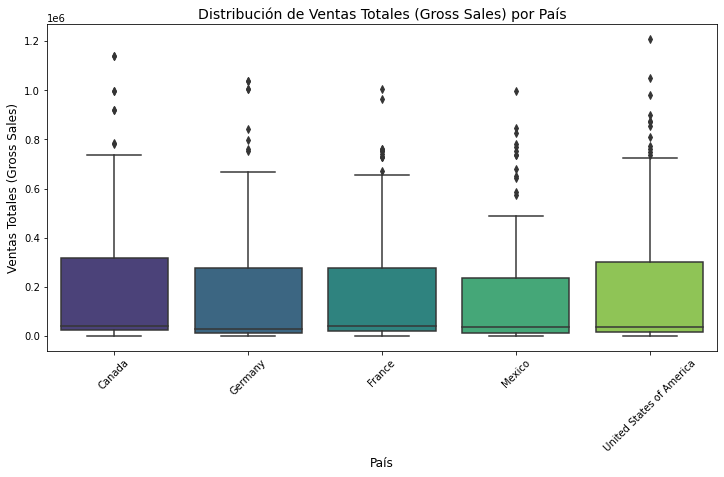

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_df, x='country', y='gross_sales', palette='viridis')
plt.title("Distribución de Ventas Totales (Gross Sales) por País", fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Ventas Totales (Gross Sales)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


* Estados Unidos y Canadá destacan por tener un mayor número de outliers en gross_sales, lo que indica picos de ventas probablemente impulsados por productos específicos o estrategias agresivas de descuentos y marketing.

* México muestra la menor dispersión y rango de ventas, indicando un mercado más consistente pero con menos variabilidad, lo que podría limitar oportunidades de aumentar profit.

* Alemania y Francia tienen distribuciones más equilibradas, con menos valores extremos, lo que sugiere un mercado más estable.

* Estados Unidos tiene los valores más altos de ventas totales, presentando el mayor potencial para optimizar estrategias que incrementen profit

#### Comparación del beneficio o **profit** por Producto

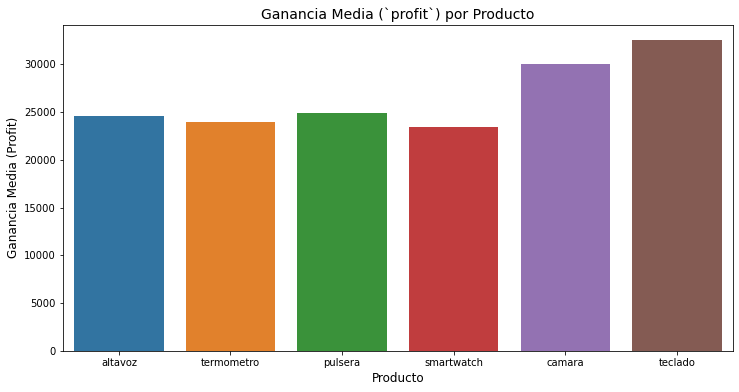

In [121]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico sin barras de error
plt.figure(figsize=(12, 6))
sns.barplot(data=datos_df, x='product', y='profit', estimator=np.mean, ci=None)
plt.title("Ganancia Media (`profit`) por Producto", fontsize=14)
plt.xlabel("Producto", fontsize=12)
plt.ylabel("Ganancia Media (Profit)", fontsize=12)
plt.show()


* Teclado y Cámara: Estos productos destacan como los más rentables en términos de ganancia media, con el teclado liderando por un pequeño margen.
* Productos Intermedios (Altavoz, Termómetro, Pulsera, Smartwatch): Aunque tienen ganancias medias similares, están por debajo de los productos más rentables.

Los productos con menor ganancia media, como el altavoz y el termómetro, podrían requerir estrategias de optimización, como ajustes de precios, descuentos o reducción de costos.

#### Distribución de productos vendidos **units_sold** por Segmento. 

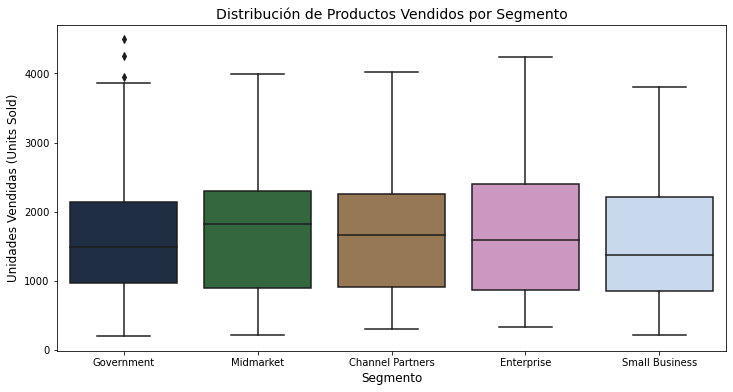

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_df, x='segment', y='units_sold', palette='cubehelix')
plt.title("Distribución de Productos Vendidos por Segmento", fontsize=14)
plt.xlabel("Segmento", fontsize=12)
plt.ylabel("Unidades Vendidas (Units Sold)", fontsize=12)
plt.show()


Los segmentos _Midmarket_, _Channel Partners_, _Enterprise_ y _Small Business_ presentan medianas de unidades vendidas relativamente similares, mientras que Government muestra una ligera tendencia a tener ventas más bajas.


Los segmentos _Enterprise_ y _Small_ Business presentan una mayor dispersión en los datos, lo que indica que dentro de estos segmentos hay una mezcla significativa entre clientes de alto y bajo volumen.

El segmento _Government_ tiene algunas ventas atípicamente altas (outliers), lo que sugiere que ciertos clientes gubernamentales generan compras masivas, aunque la mayoría de las transacciones son más moderadas.

Estos segmentos tienen una distribución más consistente, con menos variabilidad en comparación con los demás.

#### Relación entre **gross_sales** y **profit**

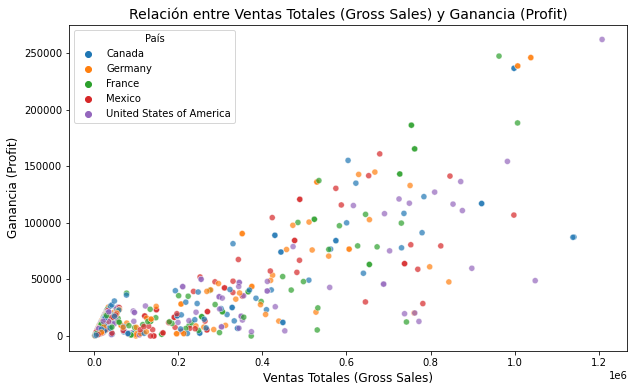

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_df, x='gross_sales', y='profit', hue='country', palette='tab10', alpha=0.7)
plt.title("Relación entre Ventas Totales (Gross Sales) y Ganancia (Profit)", fontsize=14)
plt.xlabel("Ventas Totales (Gross Sales)", fontsize=12)
plt.ylabel("Ganancia (Profit)", fontsize=12)
plt.legend(title='País')
plt.show()


Existe una relación positiva clara entre las ventas totales (_Gross Sales_) y la ganancia (_Profit_). Esto indica que a medida que las ventas aumentan, la ganancia también lo hace de manera proporcional.

Estados Unidos y Canadá tienen puntos más dispersos en el extremo superior, lo que indica que estos países generan mayores ganancias en algunos casos.

Francia, Alemania y México tienden a concentrarse en el rango medio-bajo tanto de ventas como de ganancias, reflejando operaciones de menor escala o márgenes más ajustados.

#### Evolución temporal de las ventas gross_sales

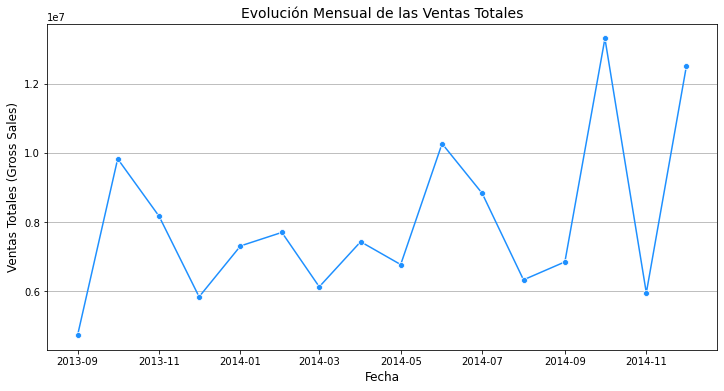

In [124]:
# Convertir `date` a formato datetime si no lo está
#datos_df['date'] = pd.to_datetime(datos_df['date'])

# Agrupación y visualización
ventas_mensuales = datos_df.groupby('date')['gross_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_mensuales, x='date', y='gross_sales', marker='o', color='dodgerblue')
plt.title("Evolución Mensual de las Ventas Totales", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Ventas Totales (Gross Sales)", fontsize=12)
plt.grid(axis='y')
plt.show()


Las ventas totales muestran variaciones considerables de un mes a otro, lo que sugiere que podrían estar influenciadas por factores temporales como promociones, eventos específicos o estacionalidad.

Se observa un notable incremento en septiembre de 2014, alcanzando el valor máximo en el período analizado. 

Otro pico relevante ocurre en noviembre de 2014, posiblemente relacionado con descuentos asociados a eventos como el Black Friday.

Aunque las ventas oscilan mes a mes, no se aprecia un claro aumento o disminución sostenida durante el período observado.

#### Mercado por Producto

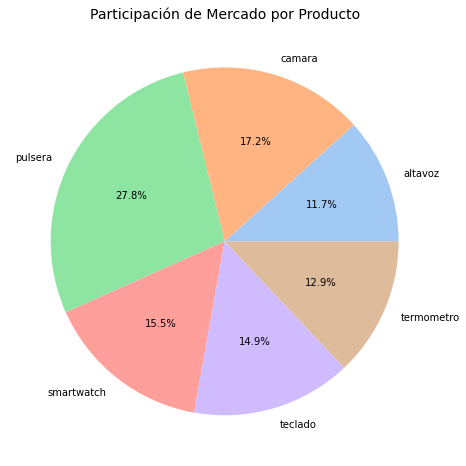

In [125]:
ventas_por_producto = datos_df.groupby('product')['gross_sales'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(ventas_por_producto['gross_sales'], labels=ventas_por_producto['product'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Participación de Mercado por Producto", fontsize=14)
plt.show()


Las pulseras lideran con un 27.8% del mercado, lo que indica que son el producto más popular y contribuyen significativamente al volumen de ventas total.

Las cámaras ocupan el segundo lugar con un 17.2%, indicando una fuerte demanda pero notablemente menor en comparación con las pulseras.

Los smartwatches (15.5%) y teclados (14.9%) tienen una participación similar, lo que sugiere una competencia entre estos productos.

Los altavoces (11.7%) y termómetros (12.9%) tienen la menor cuota de mercado, lo que puede ser indicativo de un menor interés o una estrategia de marketing menos efectiva para estos productos.

#### Análisis de los Descuentos por País

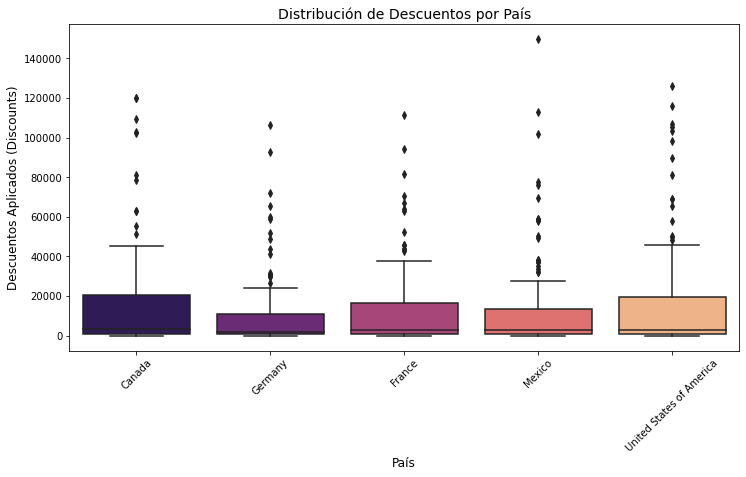

In [126]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=datos_df, x='country', y='discounts', palette='magma')
plt.title("Distribución de Descuentos por País", fontsize=14)
plt.xlabel("País", fontsize=12)
plt.ylabel("Descuentos Aplicados (Discounts)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Canadá muestra la mayor dispersión en los descuentos aplicados, con valores máximos más altos y una mayor cantidad de valores atípicos en comparación con otros países.

Alemania presenta la menor dispersión en los descuentos, con un rango más limitado.
Descuentos altos como estrategia:

Países como Canadá y Estados Unidos de América destacan por un uso frecuente de descuentos elevados, probablemente como estrategia comercial para aumentar las ventas.
México presenta una menor mediana de descuentos aplicados en comparación con otros países, lo que sugiere un enfoque más conservador en el uso de esta estrategia.
Francia exhibe una distribución de descuentos más amplia, pero con una mediana ligeramente inferior a la de Canadá y Estados Unidos.


El análisis de las gráficas revela diferencias significativas en el comportamiento de ventas, profit y estrategias comerciales entre países y productos. Canadá y Estados Unidos destacan por sus altos descuentos y ventas, pero deben evaluar su impacto en el profit. La pulsera domina en participación de mercado, mientras que productos como el teclado y la cámara generan mayores ganancias medias, lo que resalta oportunidades para ajustar estrategias según el producto. Además, las ventas totales y el profit muestran una relación positiva, indicando que esfuerzos por aumentar las ventas pueden traducirse en mayor ganancia. En general, hay margen para optimizar descuentos, segmentar estrategias por país y priorizar productos más rentables para maximizar el profit global.

Una vez realizada la limpieza de datos y el análisis exploratorio inicial, se ha decidido enfocar este proyecto en predecir y mejorar el beneficio o Profit  por país. Identificaremos qué factores, como descuentos o costos de producción, afectan más al beneficio neto y se verán posibles ajustes para maximizarlos.

## Mejorar Profit de cada País

Para conseguir el objetivo de nuestro proyecto, se realizarán 2 estudios distintos:

1. Estudiar mediante una matriz de correlación las variables más correlacionadas entre sí para luego, aplicando distintos modelos de Regresión, poder llegar a la conclusión de cuál es la función que mejor describe el comportamiento de las variables para poder establecer una política que ayude a cada país a aumentar el Beneficio Neto.

2. Se usará un algoritmo de eliminación recursiva que nos permitirá hacer una nueva selección de las variables más importantes para de nuevo volver a aplicar los modelos de regresión y ver en qué caso se obtiene un mejor rendimiento.

En los modelos de regresión se procederá a estandarizar las variables; si estas tienen diferentes escalas, los coeficientes de la regresión pueden ser difíciles de comparar. Estandarizar asegura que todos los coeficientes estén en la misma escala.

Para mejorar el Beneficio Neto, el primer paso ha de ser estudiar qué variables se relacionan más con la variable objetivo 'profit'. Esta variable se calcula de la siguiente manera:

* **Gross Sales** nos proporciona el valor total de las ventas antes de descuentos.

        Gross Sales = Units Sold * Sale Price

* **COGS** proprociona el costo total de los bienes vendidos
         
        COGS = Units Sold * Manufacturing Price

* **Profit** se calcula directamente como:
  
         Profit = Sales - COGS


#### One Hot Encoding

Para ciertos algoritmos y concretamente los que se usarán en este análisis es necesario que las columnas pasen a ser numéricas. Para ello, se usará __One Hot Enconding__. Las columnas '_segment_', '_country_', '_product_', '_discount_band_' y '_month_name_' pasarán a tomar valores 0 o 1. El procedimiento es el siguiente:

Los valores que toma '_segment_' son los siguientes: '_Government_', '_Midmarket_', '_Channel Partners_',' _Enterprise_', '_Small Business_'. 
Aplicando __One Hot Enconding__ cada valor de dicha columna _segment_ pasará a ser una nueva columna. La columna correspondiente tomará valor 1 si el '_segment_' de dicha fila tomaba ese valor y 0 si no lo tomaba.  


In [127]:
# imprimir columnas categóricas:
categorical_columns = datos_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['segment', 'country', 'product', 'discount_band', 'month_name'], dtype='object')


Entre las distintas configuraciones se ha puesto drop_first = False, ya que si no no saldrá explícitamente la columna de Canadá. Esto es debido a que One Hot Encoding elimina la primera categoría como referencia, lo que siginifica que todas las filas donde las columnas restantes (country_France, Germany, etc) tienen valor 0, corresponderían a Canada. 

Para facilitar el entendimiento, se creará una columna específica para Canadá:

In [128]:
# Lista de columnas categóricas
columnas_categoricas = ['segment', 'country', 'product', 'discount_band', 'month_name']

# Aplicar One-Hot Encoding
datos_encoded_df = pd.get_dummies(datos_df, columns=columnas_categoricas, drop_first=False)

# Limpiar espacios en los nombres de las columnas resultantes
datos_encoded_df.columns = datos_encoded_df.columns.str.replace(' ', '_')
print("Columnas tras One-Hot Encoding:", datos_encoded_df.columns)


# Información del DataFrame transformado
print("Columnas tras One-Hot Encoding (sin drop_first):", datos_encoded_df.columns)
print("Shape del DataFrame codificado:", datos_encoded_df.shape)


Columnas tras One-Hot Encoding: Index(['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales',
       'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'year',
       'segment_Channel_Partners', 'segment_Enterprise', 'segment_Government',
       'segment_Midmarket', 'segment_Small_Business', 'country_Canada',
       'country_France', 'country_Germany', 'country_Mexico',
       'country_United_States_of_America', 'product_altavoz', 'product_camara',
       'product_pulsera', 'product_smartwatch', 'product_teclado',
       'product_termometro', 'discount_band_High', 'discount_band_Low',
       'discount_band_Medium', 'discount_band_None', 'month_name_April',
       'month_name_August', 'month_name_December', 'month_name_February',
       'month_name_January', 'month_name_July', 'month_name_June',
       'month_name_March', 'month_name_May', 'month_name_November',
       'month_name_October', 'month_name_September'],
      dtype='object')
Columnas tras One-Hot Enco

### 1. ESTUDIO CON MATRIZ DE CORRELACIÓN

Con la matriz de correlación mostraremos la intensidad y dirección de la relación entre dos o más variables, en nuestro caso, se mostrará la relación entre profit con las demás variables.

El coeficiente de correlación oscila entre -1 y +1, donde -1 significa una correlación negativa perfecta, +1 significa una correlación positiva perfecta y 0 significa que no hay correlación entre las variables.

#### 1.1 MATRIZ DE CORRELACIÓN POR PAÍSES

En la creación de la matriz de correlación por país, el objetivo principal es analizar qué variables tienen una relación significativa con __profit__. Se excluyen columnas irrelevantes o no numéricas porque:

* Variables categóricas: Estas ya fueron codificadas con One-Hot Encoding y no tienen relación directa en términos de correlación lineal.

* Variables derivadas o redundantes: Como __gross_sales__, __cogs__ y __profit__ son calculadas directamente a partir de otras columnas, pueden tener alta correlación. Las evaluaremos en una etapa posterior (al estudiar la regresión) para decidir si se eliminan, ya que podrían causar multicolinealidad.

La columna date puede ser relevante, pero solo si se transforma en variables numéricas o temporales (como días desde el inicio, mes o trimestre). Por ello, hemos incluido la extracción de una nueva columna days_since_start.

La columna **days_since_start** representa el número de días transcurridos desde la primera fecha registrada en los datos de cada país hasta cada registro individual. Esta columna permite medir tendencias temporales relativas (sin depender directamente del calendario), como la evolución de **profit** o cualquier otra métrica a lo largo del tiempo.


In [ ]:
#Crear la columna 'days_since_start' evitando el SettingWithCopyWarning
def add_days_since_start_column(country_data):
    # Comprobar si 'date' está en las columnas
    if 'date' in country_data.columns:
        # Hacer una copia del DataFrame para evitar modificar el original
        country_data = country_data.copy()
        country_data['days_since_start'] = (country_data['date'] - country_data['date'].min()).dt.days
    return country_data

# Función para crear la matriz de correlación inicial
def create_full_correlation_matrix_by_country(country_data):
    numeric_columns = country_data.select_dtypes(include=['float64', 'int64']).columns
    
    # Generar matriz de correlación
    correlation_matrix = country_data[numeric_columns].corr()
    
    # Seleccionar correlación con 'profit' y ordenarla
    target_corr = correlation_matrix['profit'].drop(labels=['profit'], errors='ignore')
    sorted_corr = target_corr.sort_values(ascending=False)
    return sorted_corr

# Crear matrices de correlación por país
country_columns = [col for col in datos_encoded_df.columns if col.startswith('country_')]
country_correlations_full = {}

for country_col in country_columns:
    country_name = country_col.replace('country_', '').replace('_', ' ')
    
    # Filtrar los datos del país
    country_data = datos_encoded_df[datos_encoded_df[country_col] == 1]

    country_data = add_days_since_start_column(country_data)
    
    # Crear la matriz de correlación completa
    country_correlations_full[country_name] = create_full_correlation_matrix_by_country(country_data)

# Mostrar resultados
for country_name, corr in country_correlations_full.items():
    print(f"\nMatriz de correlación completa para {country_name}:")
    print(corr)



Matriz de correlación completa para Canada:
sales                  0.852574
gross_sales            0.837267
cogs                   0.791100
sale_price             0.671796
discounts              0.509351
units_sold             0.263340
month_number           0.074550
manufacturing_price    0.072899
days_since_start       0.053466
year                   0.001049
Name: profit, dtype: float64

Matriz de correlación completa para France:
sales                  0.866372
gross_sales            0.849551
cogs                   0.797951
sale_price             0.689154
discounts              0.408366
units_sold             0.184440
manufacturing_price    0.112370
year                   0.044637
days_since_start       0.040372
month_number          -0.011519
Name: profit, dtype: float64

Matriz de correlación completa para Germany:
sales                  0.875406
gross_sales            0.858630
cogs                   0.806589
sale_price             0.678471
units_sold             0.372843
discou

#### Variables Redundantes

* **days_since_start**: En todos los paises la correlación es muy baja:
  * Canada: 0.053
  * France: 0.040
  * Germany: 0.002
  * Mexico: -0.007
  * USA: 0.032 

* **year**: Tiene una correlación extremadamente baja con **profit** en todos los países, lo que sugiere que no afecta directamente a los beneficios.

* **month_number**: Similar a **days_since_start**, presenta correlaciones bajas o negativas y no parece contribuir significativamente a explicar el comportamiento de **profit**.

Dado que **days_since_start**, **year**, y **month_number** no muestran correlaciones significativas con **profit** y probablemente introducen ruido al análisis, procederemos a eliminarlas antes de proceder a los modelos de regresió, de esta forma simplificamos el conjunto de datos y evitar que columnas irrelevantes afecten los modelos de regresión.

In [ ]:
# Variables consideradas irrelevantes basadas en la correlación con 'profit'
redundant_columns = ['days_since_start', 'year', 'month_number']

# Crear una función para eliminar las columnas redundantes
def remove_redundant_columns(df, redundant_columns):
    # Eliminar las columnas redundantes
    filtered_df = df.drop(columns=redundant_columns, errors='ignore')
    return filtered_df

# Aplicar la eliminación a los datos por país
country_correlations_filtered = {}

for country_col in country_columns:
    country_name = country_col.replace('country_', '').replace('_', ' ')
    
    # Filtrar los datos del país
    country_data = datos_encoded_df[datos_encoded_df[country_col] == 1]
    
    country_data = add_days_since_start_column(country_data)
    
    # Eliminar las columnas redundantes
    filtered_data = remove_redundant_columns(country_data, redundant_columns)
    
    # Crear la matriz de correlación filtrada
    country_correlations_filtered[country_name] = create_full_correlation_matrix_by_country(filtered_data)

# Mostrar las matrices de correlación filtradas
for country_name, corr in country_correlations_filtered.items():
    print(f"\nMatriz de correlación filtrada para {country_name}:")
    print(corr)



Matriz de correlación filtrada para Canada:
sales                  0.852574
gross_sales            0.837267
cogs                   0.791100
sale_price             0.671796
discounts              0.509351
units_sold             0.263340
manufacturing_price    0.072899
Name: profit, dtype: float64

Matriz de correlación filtrada para France:
sales                  0.866372
gross_sales            0.849551
cogs                   0.797951
sale_price             0.689154
discounts              0.408366
units_sold             0.184440
manufacturing_price    0.112370
Name: profit, dtype: float64

Matriz de correlación filtrada para Germany:
sales                  0.875406
gross_sales            0.858630
cogs                   0.806589
sale_price             0.678471
units_sold             0.372843
discounts              0.356894
manufacturing_price    0.083565
Name: profit, dtype: float64

Matriz de correlación filtrada para Mexico:
sales                  0.848251
gross_sales            0.831

#### Ajustar la regresión para cada país 

**Análisis de Regresión por País**

**Selección de Variables**

* Para cada país se seleccionarán las variables con una correlación mayor a 0.5 con nuestra variable objetivo _'profit'_. Estas se seleccionan dinámicamente a partir del análisis de correlación en los datos de cada país. Por ejemplo:
  - **France**: ['gross_sales', 'sales', 'cogs', 'sale_price']
  - **Germany**: ['gross_sales', 'sales', 'cogs', 'sale_price']
  - **Mexico**: ['gross_sales', 'sales', 'cogs', 'discounts', 'sale_price']
  - **United States of America**: ['gross_sales', 'sales', 'cogs', 'sale_price']
  - **Canada**: ['gross_sales', 'sales', 'cogs', 'discounts', 'sale_price']

**Normalización de Datos**
* Las variables seleccionadas serán escaladas utilizando **StandardScaler** para normalizarlas, asegurando que cada una contribuya de manera equivalente al modelo.

**Modelos de Regresión**
Se entrenarán y evaluarán cuatro modelos de regresión:
1. **Regresión Lineal**:
   - Ajusta una línea recta a los datos para predecir el valor de _profit_.
   - Es sencillo pero puede enfrentar problemas como multicolinealidad y sobreajuste.

2. **Regresión Ridge**:
   - Variante de la regresión lineal que incluye una penalización proporcional al cuadrado de los coeficientes.
   - Reduce el impacto de la multicolinealidad y el sobreajuste.

3. **Regresión Lasso**:
   - Similar a Ridge, pero con una penalización proporcional al valor absoluto de los coeficientes.
   - Permite que algunos coeficientes sean reducidos a 0, seleccionando automáticamente las variables más relevantes.

4. **Regresión Polinomial con Ridge**:
   - Extiende la regresión lineal a relaciones no lineales utilizando características polinómicas y aplicando regularización Ridge.

**Métricas de Evaluación**
Los modelos se evaluarán utilizando:
* **MSE (Mean Squared Error)**: Representa la magnitud de los errores entre las predicciones y los valores reales. Un menor valor indica mejor desempeño.
* **R² (Coeficiente de determinación)**: Indica la proporción de la variabilidad en _profit_ explicada por las variables independientes. Un valor cercano a 1 indica un buen ajuste.
* **MAE (Mean Absolute Error)**: Promedio de las diferencias absolutas entre predicciones y valores reales, indicando el error promedio en las unidades originales.
* **Validación cruzada (RepeatedKFold)**: Divide los datos en múltiples particiones para evaluar el modelo de manera más robusta, repitiendo el proceso varias veces para garantizar resultados consistentes.

**Optimización de Parámetros**
* **GridSearchCV** se utiliza para optimizar el parámetro `alpha` en Ridge y Lasso, controlando la regularización.
* En Lasso, se ajusta:
  - Número máximo de iteraciones: `max_iter=100000`
  - Tolerancia estricta: `tol=1e-4`, para mejorar la convergencia.


In [131]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedKFold
import numpy as np

# Función para calcular métricas de evaluación
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, r2, mae

# Función para analizar cada país con modelos de regresión
def analyze_country_with_selected_features(country_data, country_name):
    # Seleccionar variables con correlación mayor a 0.5 con 'profit'
    corr_matrix = country_data.corr()
    selected_features = corr_matrix['profit'][corr_matrix['profit'] > 0.5].drop('profit').index.tolist()

    print(f"\n*** Análisis para {country_name} ***")
    print(f"Variables seleccionadas como independientes para {country_name}: {selected_features}")

    if len(selected_features) == 0:
        print(f"No se seleccionaron variables para {country_name}.")
        return

    # Dividir datos en variables independientes (X) y dependiente (y)
    X = country_data[selected_features]
    y = country_data['profit']
    
    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Validación cruzada
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    # 1. Regresión Lineal
    lin_reg = LinearRegression()
    cv_scores = cross_val_score(lin_reg, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')
    mean_cv_mse = -np.mean(cv_scores)
    mean_cv_r2 = np.mean(cross_val_score(lin_reg, X_scaled, y, cv=cv, scoring='r2'))
    print(f"Regresión Lineal (CV) - Promedio MSE: {mean_cv_mse:.4f}, Promedio R^2: {mean_cv_r2:.4f}")

    # 2. Regresión Ridge con Validación Cruzada y Búsqueda de Hiperparámetros
    ridge_reg = Ridge(max_iter=10000)
    ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
    ridge_search = GridSearchCV(ridge_reg, ridge_param_grid, cv=cv, scoring='neg_mean_squared_error')
    ridge_search.fit(X_train, y_train)
    mse_ridge, r2_ridge, mae_ridge = evaluate_model(ridge_search.best_estimator_, X_test, y_test)
    print(f"Regresión Ridge (con GridSearch y CV) - MSE: {mse_ridge:.4f}, R^2: {r2_ridge:.4f}, MAE: {mae_ridge:.4f}, Alpha: {ridge_search.best_params_['alpha']}")

    # 3. Regresión Lasso con Validación Cruzada y Búsqueda de Hiperparámetros
    try:
        lasso_reg = Lasso(max_iter=10000, tol=1e-5)  # Ajustar iteraciones y tolerancia
        lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0]}
        lasso_search = GridSearchCV(lasso_reg, lasso_param_grid, cv=cv, scoring='neg_mean_squared_error')
        lasso_search.fit(X_train, y_train)
        mse_lasso, r2_lasso, mae_lasso = evaluate_model(lasso_search.best_estimator_, X_test, y_test)
        print(f"Regresión Lasso (con GridSearch y CV) - MSE: {mse_lasso:.4f}, R^2: {r2_lasso:.4f}, MAE: {mae_lasso:.4f}, Alpha: {lasso_search.best_params_['alpha']}")
    except Exception as e:
        print(f"Error en Lasso para {country_name}: {e}")

    # 4. Regresión Polinomial con Ridge
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_ridge_reg = Ridge(alpha=1.0, max_iter=10000)
    poly_ridge_reg.fit(X_train_poly, y_train)
    mse_poly = mean_squared_error(y_test, poly_ridge_reg.predict(X_test_poly))
    r2_poly = r2_score(y_test, poly_ridge_reg.predict(X_test_poly))
    print(f"Regresión Polinomial con Ridge - MSE: {mse_poly:.4f}, R^2: {r2_poly:.4f}")

# Función principal para analizar todos los países
def analyze_all_countries(datos_encoded_df, countries):
    for country_name in countries:
        country_data = datos_encoded_df[datos_encoded_df[f'country_{country_name.replace(" ", "_")}'] == 1]
        analyze_country_with_selected_features(country_data, country_name)

# Lista de países para analizar
countries = ['France', 'Germany', 'Mexico', 'United States of America', 'Canada']

# Llamada al análisis para todos los países
analyze_all_countries(datos_encoded_df, countries)



*** Análisis para France ***
Variables seleccionadas como independientes para France: ['sale_price', 'gross_sales', 'sales', 'cogs']
Regresión Lineal (CV) - Promedio MSE: 45132429.9047, Promedio R^2: 0.9745
Regresión Ridge (con GridSearch y CV) - MSE: 48337049.4300, R^2: 0.9679, MAE: 3424.1081, Alpha: 0.01
Regresión Lasso (con GridSearch y CV) - MSE: 48772458.1599, R^2: 0.9676, MAE: 3385.8514, Alpha: 1.0
Regresión Polinomial con Ridge - MSE: 65651269.7575, R^2: 0.9564

*** Análisis para Germany ***
Variables seleccionadas como independientes para Germany: ['sale_price', 'gross_sales', 'sales', 'cogs']
Regresión Lineal (CV) - Promedio MSE: 76544167.8371, Promedio R^2: 0.8715
Regresión Ridge (con GridSearch y CV) - MSE: 163790792.3083, R^2: 0.9265, MAE: 5457.1047, Alpha: 0.01
Regresión Lasso (con GridSearch y CV) - MSE: 162668767.3139, R^2: 0.9270, MAE: 5299.3250, Alpha: 1.0
Regresión Polinomial con Ridge - MSE: 109613476.3708, R^2: 0.9508

*** Análisis para Mexico ***
Variables selecci

| País                        | Variables Utilizadas                              | Modelo                          | MSE                         | R²        |
|-----------------------------|--------------------------------------------------|---------------------------------|-----------------------------|----------|
| **France**                  | `sale_price`, `gross_sales`, `sales`, `cogs`     | Regresión Lineal (CV)           | 45,132,429.90 (Promedio)    | **0.9745** (Promedio) |
|                             |      | Regresión Ridge (GridSearch CV) | 48,337,049.43               | 0.9679    |
|                             |      | Regresión Lasso (GridSearch CV) | 48,772,458.16               | 0.9676    |
|                             |      | Regresión Polinomial con Ridge  | 65,651,269.76               | 0.9564    |
| **Germany**                 | `sale_price`, `gross_sales`, `sales`, `cogs`     | Regresión Lineal (CV)           | 76,544,167.84 (Promedio)    | 0.8715 (Promedio) |
|                             |      | Regresión Ridge (GridSearch CV) | 163,790,792.31              | 0.9265    |
|                             |     | Regresión Lasso (GridSearch CV) | 162,668,767.31              | 0.9270    |
|                             |     | Regresión Polinomial con Ridge  | 109,613,476.37              | **0.9508** |
| **Mexico**                  | `sale_price`, `gross_sales`, `discounts`, `sales`, `cogs` | Regresión Lineal (CV)           | 66,138,353.02 (Promedio)    | 0.9321 (Promedio) |
|                             |  | Regresión Ridge (GridSearch CV) | 29,636,650.20               | 0.9686    |
|                             |  | Regresión Lasso (GridSearch CV) | 28,233,622.05               | **0.9701** |
|                             |  | Regresión Polinomial con Ridge  | 37,647,900.51               | 0.9602    |
| **United States of America** | `sale_price`, `gross_sales`, `sales`, `cogs`     | Regresión Lineal (CV)           | 99,301,367.29 (Promedio)    | 0.9107 (Promedio) |
|                             |     | Regresión Ridge (GridSearch CV) | 65,148,390.59               | **0.9515** |
|                             |      | Regresión Lasso (GridSearch CV) | 66,115,439.22               | 0.9508    |
|                             |      | Regresión Polinomial con Ridge  | 88,192,870.39               | 0.9344    |
| **Canada**                  | `sale_price`, `gross_sales`, `discounts`, `sales`, `cogs` | Regresión Lineal (CV)           | 93,239,625.46 (Promedio)    | 0.9248 (Promedio) |
|                             |  | Regresión Ridge (GridSearch CV) | 195,477,539.69              | 0.8359    |
|                             |  | Regresión Lasso (GridSearch CV) | 198,255,556.39              | 0.8335    |
|                             |  | Regresión Polinomial con Ridge  | 80,154,961.48               | **0.9327** |


### 2. ESTUDIO CON ELIMINACIÓN DE ATRIBUTOS MEDIANTE ELIMINACIÓN RECURSIVA RFECV

Se utilizan técnicas de selección automática como **RFECV** para identificar las variables más relevantes para predecir la variable objetivo ('profit'). RFECV garantiza que se mantenga un número mínimo de 3 variables seleccionadas. Ejemplos:


Se utiliza **StandardScaler** para estandarizar las variables seleccionadas. Esto asegura que todas las variables contribuyan de manera equitativa en la construcción de los modelos.

Se evaluarán los siguientes modelos para cada país:

* Regresión Lineal: Proporciona una línea recta ajustada para predecir los valores de 'profit'.

* Regresión Ridge: Variante de regresión lineal que incluye regularización, penalizando los coeficientes grandes. Reduce problemas de sobreajuste y multicolinealidad.

*Regresión Lasso: Similar a Ridge, pero permite que algunos coeficientes se reduzcan exactamente a 0.Selección automática de características relevante.

*ElasticNet: Combina Ridge y Lasso, equilibrando regularización L1 y L2 mediante el parámetro l1_ratio.Ideal cuando hay alta correlación entre variables independientes.

*Regresión Polinomial con Ridge: Extiende las relaciones lineales con términos polinómicos de grado 2 o 3.
Incluye regularización Ridge para mitigar el sobreajuste.

Los modelos serán evaluados utilizando:

* MSE (Mean Squared Error): Cuantifica el error promedio al cuadrado entre las predicciones y los valores reales.
* R² (Coeficiente de Determinación): Indica qué proporción de la variabilidad en 'profit' es explicada por las variables independientes.
* Validación cruzada (GridSearchCV): Divide los datos en múltiples particiones para garantizar que los resultados no dependan de una sola partición de datos.

**GridSearchCV** se utiliza para optimizar los parámetros de los modelos:
* alpha en Ridge, Lasso y ElasticNet.
* l1_ratio en ElasticNet para ajustar la combinación entre regularización L1 y L2.
* degree y alpha en la Regresión Polinomial con Ridge.


In [132]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV
import numpy as np
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

def analyze_country_with_rfe_optimized(country_data, country_name):
    print(f"\n*** Análisis para {country_name} ***")

    # Dividir datos en variables independientes (X) y dependiente (y)
    y = country_data['profit']
    X = country_data.drop(columns=['profit']).select_dtypes(include=['float64', 'int64'])

    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # División en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Aplicar RFECV para seleccionar características
    base_model = LinearRegression()
    rfecv = RFECV(estimator=base_model, step=1, cv=5, scoring='r2', min_features_to_select=3)
    rfecv.fit(X_train, y_train)
    selected_features = X.columns[rfecv.support_]
    print(f"Variables seleccionadas para {country_name}: {list(selected_features)}")

    # Filtrar las características seleccionadas
    X_train_selected = X_train[:, rfecv.support_]
    X_test_selected = X_test[:, rfecv.support_]

    # Resultados
    results = []

    # 1. Regresión Lineal
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_selected, y_train)
    y_pred = lin_reg.predict(X_test_selected)
    results.append({
        "Modelo": "Linear Regression",
        "MSE": mean_squared_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "Configuración": "NA"
    })

    # 2. Regresión Ridge con GridSearchCV
    ridge_param_grid = {'alpha': np.logspace(-5, 2, 50)}
    ridge_reg = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='r2')
    ridge_reg.fit(X_train_selected, y_train)
    best_ridge = ridge_reg.best_estimator_
    y_pred_ridge = best_ridge.predict(X_test_selected)
    results.append({
        "Modelo": "Ridge Regression",
        "MSE": mean_squared_error(y_test, y_pred_ridge),
        "R²": r2_score(y_test, y_pred_ridge),
        "Configuración": ridge_reg.best_params_
    })

    # 3. Regresión Lasso con GridSearchCV
    lasso_param_grid = {'alpha': np.logspace(-5, 2, 50)}
    lasso_reg = GridSearchCV(Lasso(max_iter=50000), lasso_param_grid, cv=5, scoring='r2')
    lasso_reg.fit(X_train_selected, y_train)
    best_lasso = lasso_reg.best_estimator_
    y_pred_lasso = best_lasso.predict(X_test_selected)
    results.append({
        "Modelo": "Lasso Regression",
        "MSE": mean_squared_error(y_test, y_pred_lasso),
        "R²": r2_score(y_test, y_pred_lasso),
        "Configuración": lasso_reg.best_params_
    })

    # 4. ElasticNet con GridSearchCV
    enet_param_grid = {'alpha': np.logspace(-5, 2, 30), 'l1_ratio': np.linspace(0.1, 1.0, 10)}
    enet_reg = GridSearchCV(ElasticNet(max_iter=50000), enet_param_grid, cv=5, scoring='r2')
    enet_reg.fit(X_train_selected, y_train)
    best_enet = enet_reg.best_estimator_
    y_pred_enet = best_enet.predict(X_test_selected)
    results.append({
        "Modelo": "ElasticNet Regression",
        "MSE": mean_squared_error(y_test, y_pred_enet),
        "R²": r2_score(y_test, y_pred_enet),
        "Configuración": enet_reg.best_params_
    })

    # 5. Regresión Polinomial con Ridge (GridSearch)
    best_poly_mse = float('inf')
    best_poly_r2 = 0
    best_poly_config = {}
    for degree in range(1, 4):  # Evaluar grados 2 y 3
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train_selected)
        X_test_poly = poly.transform(X_test_selected)
        poly_ridge_param_grid = {'alpha': np.logspace(-5, 2, 30)}
        poly_ridge = GridSearchCV(Ridge(), poly_ridge_param_grid, cv=5, scoring='r2')
        poly_ridge.fit(X_train_poly, y_train)
        y_pred_poly = poly_ridge.best_estimator_.predict(X_test_poly)
        mse_poly = mean_squared_error(y_test, y_pred_poly)
        r2_poly = r2_score(y_test, y_pred_poly)
        if r2_poly > best_poly_r2:  # Guardar mejor resultado
            best_poly_mse = mse_poly
            best_poly_r2 = r2_poly
            best_poly_config = {"degree": degree, "alpha": poly_ridge.best_params_['alpha']}

    results.append({
        "Modelo": "Polynomial Ridge Regression",
        "MSE": best_poly_mse,
        "R²": best_poly_r2,
        "Configuración": best_poly_config
    })

    # Mostrar resultados
    for res in results:
        print(f"Modelo: {res['Modelo']}, MSE: {res['MSE']:.4f}, R²: {res['R²']:.4f}, Configuración: {res['Configuración']}")


# Función para analizar todos los países
def analyze_all_countries_with_rfe(datos_encoded_df, countries):
    for country_name in countries:
        country_data = datos_encoded_df[datos_encoded_df[f'country_{country_name.replace(" ", "_")}'] == 1]
        analyze_country_with_rfe_optimized(country_data, country_name)


# Lista de países para analizar
countries = ['France', 'Germany', 'Mexico', 'United States of America', 'Canada']

# Llamada al análisis
analyze_all_countries_with_rfe(datos_encoded_df, countries)



*** Análisis para France ***
Variables seleccionadas para France: ['gross_sales', 'discounts', 'sales', 'cogs']
Modelo: Linear Regression, MSE: 49487696.9729, R²: 0.9672, Configuración: NA
Modelo: Ridge Regression, MSE: 49322393.8094, R²: 0.9673, Configuración: {'alpha': 1e-05}
Modelo: Lasso Regression, MSE: 49322596.3770, R²: 0.9673, Configuración: {'alpha': 1e-05}
Modelo: ElasticNet Regression, MSE: 49322596.3770, R²: 0.9673, Configuración: {'alpha': 1e-05, 'l1_ratio': 1.0}
Modelo: Polynomial Ridge Regression, MSE: 31636837.3410, R²: 0.9790, Configuración: {'degree': 2, 'alpha': 0.02395026619987486}

*** Análisis para Germany ***
Variables seleccionadas para Germany: ['gross_sales', 'discounts', 'sales']
Modelo: Linear Regression, MSE: 390831428.5922, R²: 0.8246, Configuración: NA
Modelo: Ridge Regression, MSE: 600500526.5244, R²: 0.7305, Configuración: {'alpha': 13.89495494373136}
Modelo: Lasso Regression, MSE: 398716114.8648, R²: 0.8210, Configuración: {'alpha': 100.0}
Modelo: Ela


| País                        | Variables Utilizadas             | Modelo                          | MSE                         | R²        | Configuración                          |
|-----------------------------|----------------------------------|---------------------------------|-----------------------------|----------|----------------------------------------|
| **France**                  | `gross_sales`, `discounts`, `sales`, `cogs` | Regresión Lineal               | 49,487,697.07               | 0.9672    | NA                                     |
|                             |                                  | Regresión Ridge                | 49,322,393.81               | 0.9673    | {'alpha': 1e-05}                      |
|                             |                                  | Regresión Lasso                | 49,322,596.38               | 0.9673    | {'alpha': 1e-05}                      |
|                             |                                  | ElasticNet Regression          | 49,322,596.38               | 0.9673    | {'alpha': 1e-05, 'l1_ratio': 1.0}     |
|                             |                                  | Polynomial Ridge Regression    | **31,636,837.34**           | **0.9790** | {'degree': 2, 'alpha': 0.02395}       |
| **Germany**                 | `gross_sales`, `discounts`, `sales` | Regresión Lineal               | 164,707,097.80             |  0.8246    | NA                                     |
|                             |                                  | Regresión Ridge                | 159,890,900.63             | 0.7305    | {'alpha': 0.02683}                    |
|                             |                                  | Regresión Lasso                | 159,967,035.65             | 0.8210    | {'alpha': 37.2759}                    |
|                             |                                  | ElasticNet Regression          | 158,916,351.02             | 0.7248    | {'alpha': 0.00149, 'l1_ratio': 0.8}   |
|                             |                                  | Polynomial Ridge Regression    | **46,258,427.66**           | **0.8367** | {'degree': 2, 'alpha': 10.82636733874054}       |
| **Mexico**                  | `gross_sales`, `sales`, `cogs`  | Regresión Lineal               | 28,371,596.23               | 0.9700    | NA                                     |
|                             |                                  | Regresión Ridge                | 28,397,986.22               | 0.9700    | {'alpha': 0.00027}                    |
|                             |                                  | Regresión Lasso                | 28,454,400.45               | 0.9699    | {'alpha': 2.6827}                     |
|                             |                                  | ElasticNet Regression          | 28,433,304.00               | 0.9699    | {'alpha': 2.0434, 'l1_ratio': 1.0}    |
|                             |                                  | Polynomial Ridge Regression    | **9,395,629.13**            | **0.9901** | {'degree': 3, 'alpha': 0.00003}       |
| **United States of America** | `gross_sales`, `discounts`, `sales`, `cogs` | Regresión Lineal               | 66,222,510.71               | 0.9507    | NA                                     |
|                             |                                  | Regresión Ridge                | 62,064,848.84               | 0.9538    | {'alpha': 0.03728}                    |
|                             |                                  | Regresión Lasso                | 61,468,301.77               | 0.9542    | {'alpha': 51.7947}                    |
|                             |                                  | ElasticNet Regression          | 61,459,111.93               | **0.9543**    | {'alpha': 0.00049, 'l1_ratio': 0.2}   |
|                             |                                  | Polynomial Ridge Regression    | 65,980,251.77               | 0.9541    | {'degree': 1, 'alpha': 0.04175318936560404}       |
| **Canada**                  | `gross_sales`, `discounts`, `sales`, `cogs` | Regresión Lineal               | 199,596,023.91             | 0.8324    | NA                                     |
|                             |                                  | Regresión Ridge                | 199,622,536.49             | 0.8324    | {'alpha': 1e-05}                      |
|                             |                                  | Regresión Lasso                | 199,625,588.67             | 0.8324    | {'alpha': 1e-05}                      |
|                             |                                  | ElasticNet Regression          | 199,625,588.67             | 0.8324    | {'alpha': 1e-05, 'l1_ratio': 1.0}     |
|                             |                                  | Polynomial Ridge Regression    | **85,564,553.39**           | **0.9282** | {'degree': 2, 'alpha': 0.00452}       |


### 3. FUNCIÓN DE COMPORTAMIENTO DE VARIABLES 

El primer paso para encontrar la función que describe el comportamiento de las variables será seleccionar el mejor modelo de Regresión.

En esta tabla pueden observarse los mejores resultados del estudio 1 (Matriz de Correlación) y estudio 2 (Eliminación Recursiva)



| País                        | Mejor Modelo                       | MSE Mejor Modelo                  | R² Mejor Modelo                |
|-----------------------------|------------------------------------|-----------------------------------|--------------------------------|
| **France**                  | Regresión Lasso                    | 48,772,458.16 (Matriz de Correlación) | 0.9676 (Matriz de Correlación)  |
|                             | Regresión Polinomial con Ridge     | 31,636,837.34 (Eliminación Recursiva) | **0.9790 (Eliminación Recursiva)**  |
| **Germany**                 | Regresión Polinomial con Ridge     | 109,613,476.37 (Matriz de Correlación) | **0.9508 (Matriz de Correlación)** |
|                             | Regresión Polinomial con Ridge     | 46,258,427.66 (Eliminación Recursiva) | 0.8367 (Eliminación Recursiva) |
| **Mexico**                  | Regresión Lasso                    | 28,233,622.05 (Matriz de Correlación) | 0.9701 (Matriz de Correlación)  |
|                             | Regresión Polinomial con Ridge     | 9,395,629.13 (Eliminación Recursiva)  | **0.9901 (Eliminación Recursiva)** |
| **United States of America** | Regresión Ridge                   | 62,064,848.84 (Matriz de Correlación) | 0.9538 (Matriz de Correlación) |
|                             | Regresión ElasticNet               | 61,459,111.93 (Eliminación Recursiva) | **0.9543 (Eliminación Recursiva)** |
| **Canada**                  | Regresión Polinomial con Ridge     | 80,154,961.48 (Matriz de Correlación) | **0.9327 (Matriz de Correlación)** |
|                             | Regresión Polinomial con Ridge     | 85,564,553.39 (Eliminación Recursiva) | 0.9282 (Eliminación Recursiva) |


Como puede obervarse en la tabla, la eliminación recursiva proporciona mejores resultados en la mayoría de los casos que el estudio con la matriz de correlación. Además, dentro de las distintas regresiones, la Regresión Polinomial con Ridge es la que mejor resultados ha proporcionado.

La tabla resumen final sería la siguiente: 

| País                        | Mejor Modelo                       | MSE Mejor Modelo                  | R² Mejor Modelo                |
|-----------------------------|------------------------------------|-----------------------------------|--------------------------------|
|  **France**                         | Regresión Polinomial con Ridge     | 31,636,837.34 (Eliminación Recursiva) | **0.9790 (Eliminación Recursiva)**  |
| **Germany**                 | Regresión Polinomial con Ridge     | 46,258,427.66 (Eliminación Recursiva) | **0.9508 (Matriz de Correlación)** |
| **Mexico**                         | Regresión Polinomial con Ridge     | 9,395,629.13 (Eliminación Recursiva)  | **0.9901 (Eliminación Recursiva)** |
| **United States of America**                            | Regresión ElasticNet               | 61,459,111.93 (Eliminación Recursiva) | **0.9543 (Eliminación Recursiva)** |
| **Canada**                  | Regresión Polinomial con Ridge     | 80,154,961.48 (Matriz de Correlación) | **0.9327 (Matriz de Correlación)** |



#### Extraer los coeficientes del modelo ajustado


*** Análisis para France ***
Función de comportamiento de Profit (Porcentaje):
(8283970.00%) * gross_sales + (-176539.43%) * discounts + (8804082.61%) * sales + (-13367635.67%) * cogs + (963864.58%) * gross_sales^2 + (-405630.05%) * gross_sales discounts + (1057354.84%) * gross_sales sales + (-1421804.47%) * gross_sales cogs + (-104654.06%) * discounts^2 + (-421396.31%) * discounts sales + (695986.51%) * discounts cogs + (1157894.31%) * sales^2 + (-1568075.92%) * sales cogs + (-32720.04%) * cogs^2

Función de comportamiento de Profit (Valores Absolutos):
(82839.7000) * gross_sales + (-1765.3943) * discounts + (88040.8261) * sales + (-133676.3567) * cogs + (9638.6458) * gross_sales^2 + (-4056.3005) * gross_sales discounts + (10573.5484) * gross_sales sales + (-14218.0447) * gross_sales cogs + (-1046.5406) * discounts^2 + (-4213.9631) * discounts sales + (6959.8651) * discounts cogs + (11578.9431) * sales^2 + (-15680.7592) * sales cogs + (-327.2004) * cogs^2

Intercepto: 29033.4484

Mét

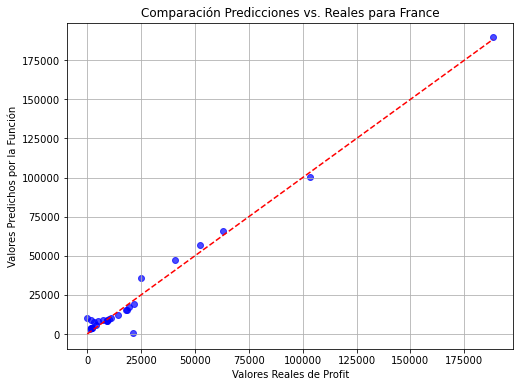


--------------------------------------------------

*** Análisis para Germany ***
Función de comportamiento de Profit (Porcentaje):
(1533027.21%) * gross_sales + (-516636.38%) * discounts + (1648789.97%) * sales + (345668.33%) * gross_sales^2 + (-369488.53%) * gross_sales discounts + (390585.71%) * gross_sales sales + (210925.16%) * discounts^2 + (-403815.47%) * discounts sales + (440322.06%) * sales^2

Función de comportamiento de Profit (Valores Absolutos):
(15330.2721) * gross_sales + (-5166.3638) * discounts + (16487.8997) * sales + (3456.6833) * gross_sales^2 + (-3694.8853) * gross_sales discounts + (3905.8571) * gross_sales sales + (2109.2516) * discounts^2 + (-4038.1547) * discounts sales + (4403.2206) * sales^2

Intercepto: 20558.8208

Métricas de validación de la función generada:
Error Absoluto Promedio (MAE): 13050.4494
Error Absoluto Máximo: 66771.3524
Correlación Predicciones vs. Reales: 0.9111


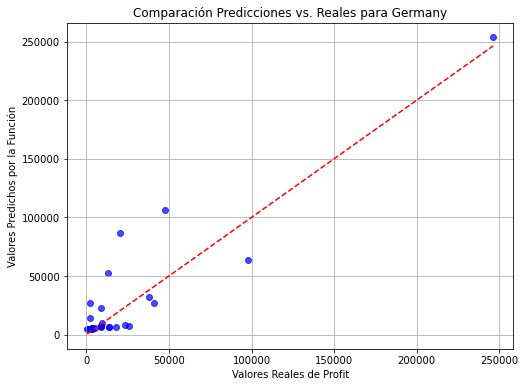


--------------------------------------------------

*** Análisis para Mexico ***
Función de comportamiento de Profit (Porcentaje):
(497547.08%) * gross_sales + (17074669.58%) * sales + (-14908795.96%) * cogs + (-43972194.01%) * gross_sales^2 + (47268021.70%) * gross_sales sales + (43254554.59%) * gross_sales cogs + (27628614.66%) * sales^2 + (-106498841.19%) * sales cogs + (32508735.66%) * cogs^2 + (7504204.26%) * gross_sales^3 + (-6809259.06%) * gross_sales^2 sales + (-6218931.97%) * gross_sales^2 cogs + (-18837965.95%) * gross_sales sales^2 + (26087128.28%) * gross_sales sales cogs + (-4797450.12%) * gross_sales cogs^2 + (-22951886.06%) * sales^3 + (82349909.71%) * sales^2 cogs + (-74834008.39%) * sales cogs^2 + (18500422.73%) * cogs^3

Función de comportamiento de Profit (Valores Absolutos):
(4975.4708) * gross_sales + (170746.6958) * sales + (-149087.9596) * cogs + (-439721.9401) * gross_sales^2 + (472680.2170) * gross_sales sales + (432545.5459) * gross_sales cogs + (276286.1466)

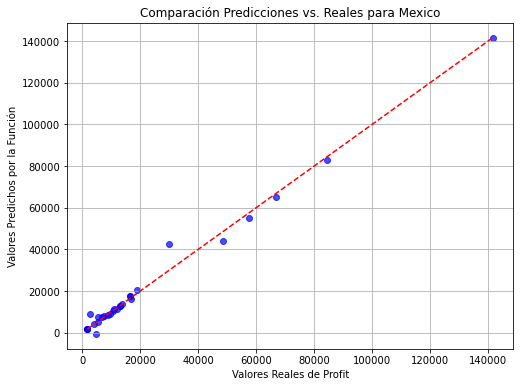


--------------------------------------------------

*** Análisis para United States of America ***
Función de comportamiento de Profit (Porcentaje):
(9328535.59%) * gross_sales + (-1247949.51%) * discounts + (10269770.75%) * sales + (-15640469.26%) * cogs

Función de comportamiento de Profit (Valores Absolutos):
(93285.3559) * gross_sales + (-12479.4951) * discounts + (102697.7075) * sales + (-156404.6926) * cogs

Intercepto: 24105.7768

Métricas de validación de la función generada:
Error Absoluto Promedio (MAE): 4747.7125
Error Absoluto Máximo: 29228.2391
Correlación Predicciones vs. Reales: 0.9781


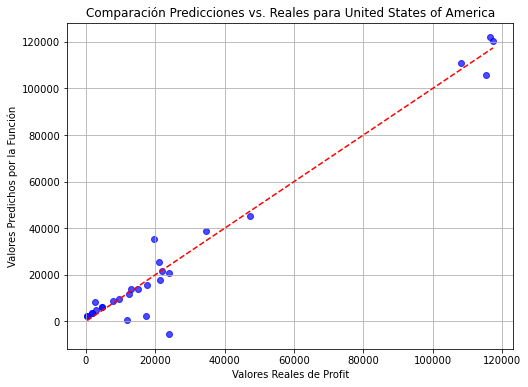


--------------------------------------------------

*** Análisis para Canada ***
Función de comportamiento de Profit (Porcentaje):
(9613179.01%) * gross_sales + (-791358.23%) * discounts + (10460218.75%) * sales + (-16170582.02%) * cogs + (3897833.91%) * gross_sales^2 + (-1104658.51%) * gross_sales discounts + (4320526.38%) * gross_sales sales + (-11335781.43%) * gross_sales cogs + (51051.96%) * discounts^2 + (-1197959.89%) * discounts sales + (2332105.61%) * discounts cogs + (4786378.45%) * sales^2 + (-12476043.40%) * sales cogs + (10600884.25%) * cogs^2

Función de comportamiento de Profit (Valores Absolutos):
(96131.7901) * gross_sales + (-7913.5823) * discounts + (104602.1875) * sales + (-161705.8202) * cogs + (38978.3391) * gross_sales^2 + (-11046.5851) * gross_sales discounts + (43205.2638) * gross_sales sales + (-113357.8143) * gross_sales cogs + (510.5196) * discounts^2 + (-11979.5989) * discounts sales + (23321.0561) * discounts cogs + (47863.7845) * sales^2 + (-124760.4340) 

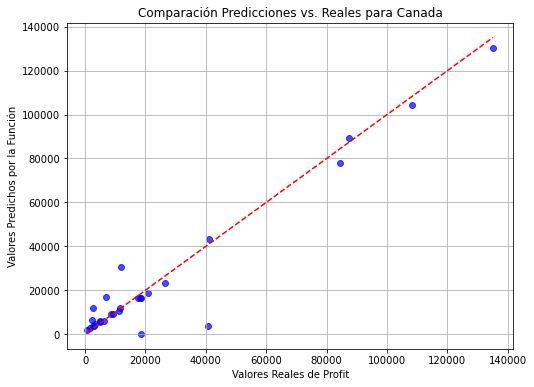


--------------------------------------------------


In [133]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, max_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


def validate_behavior_function(y_test, y_pred):
    """
    Valida la calidad de la función generada.
    """
    mae = mean_absolute_error(y_test, y_pred)
    max_err = max_error(y_test, y_pred)
    correlation = np.corrcoef(y_test, y_pred)[0, 1]  # Pearson correlation
    return mae, max_err, correlation


def generate_behavior_functions_with_validation(datos_encoded_df, countries):
    """
    Genera funciones de comportamiento del profit para cada país y valida su calidad.
    """
    for country_name in countries:
        print(f"\n*** Análisis para {country_name} ***")
        
        # Filtrar datos del país
        country_data = datos_encoded_df[datos_encoded_df[f'country_{country_name.replace(" ", "_")}'] == 1]
        y = country_data['profit']
        X = country_data.drop(columns=['profit']).select_dtypes(include=['float64', 'int64'])

        # Escalar las características
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Dividir en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        # Variables y modelo según el país
        if country_name == "France":
            selected_features = ['gross_sales', 'discounts', 'sales', 'cogs']
            poly = PolynomialFeatures(degree=2, include_bias=False)
            feature_indices = [X.columns.get_loc(f) for f in selected_features]
            X_train_poly = poly.fit_transform(X_train[:, feature_indices])
            model = Ridge(alpha=0.02395026619987486, max_iter=10000)
            model.fit(X_train_poly, y_train)
            X_test_poly = poly.transform(X_test[:, feature_indices])
            feature_names = poly.get_feature_names_out(selected_features)

        elif country_name == "Germany":
            selected_features = ['gross_sales', 'discounts', 'sales']
            poly = PolynomialFeatures(degree=2, include_bias=False)
            feature_indices = [X.columns.get_loc(f) for f in selected_features]
            X_train_poly = poly.fit_transform(X_train[:, feature_indices])
            model = Ridge(alpha=0.0001610262027560939, max_iter=10000)
            model.fit(X_train_poly, y_train)
            X_test_poly = poly.transform(X_test[:, feature_indices])
            feature_names = poly.get_feature_names_out(selected_features)

        elif country_name == "Mexico":
            selected_features = ['gross_sales', 'sales', 'cogs']
            poly = PolynomialFeatures(degree=3, include_bias=False)
            feature_indices = [X.columns.get_loc(f) for f in selected_features]
            X_train_poly = poly.fit_transform(X_train[:, feature_indices])
            model = Ridge(alpha=3.039195382313195e-05, max_iter=10000)
            model.fit(X_train_poly, y_train)
            X_test_poly = poly.transform(X_test[:, feature_indices])
            feature_names = poly.get_feature_names_out(selected_features)

        elif country_name == "United States of America":
            selected_features = ['gross_sales', 'discounts', 'sales', 'cogs']
            feature_indices = [X.columns.get_loc(f) for f in selected_features]
            model = ElasticNet(alpha=0.0004893900918477494, l1_ratio=0.2, max_iter=10000)
            model.fit(X_train[:, feature_indices], y_train)
            X_test_poly = X_test[:, feature_indices]
            feature_names = selected_features

        elif country_name == "Canada":
            selected_features = ['gross_sales', 'discounts', 'sales', 'cogs']
            poly = PolynomialFeatures(degree=2, include_bias=False)
            feature_indices = [X.columns.get_loc(f) for f in selected_features]
            X_train_poly = poly.fit_transform(X_train[:, feature_indices])
            model = Ridge(alpha=0.004520353656360245, max_iter=10000)
            model.fit(X_train_poly, y_train)
            X_test_poly = poly.transform(X_test[:, feature_indices])
            feature_names = poly.get_feature_names_out(selected_features)

        # Predicción y validación
        y_pred = model.predict(X_test_poly)

        mae, max_err, correlation = validate_behavior_function(y_test, y_pred)

        # Construcción de la función de comportamiento
        coefficients = model.coef_
        intercept = model.intercept_
        func_percent = []
        func_absolute = []
        for coef, feature in zip(coefficients, feature_names):
            if abs(coef) > 1e-3:  # Ignorar coeficientes muy pequeños
                func_percent.append(f"({coef * 100:.2f}%) * {feature}")
                func_absolute.append(f"({coef:.4f}) * {feature}")
        
        print(f"Función de comportamiento de Profit (Porcentaje):")
        print(" + ".join(func_percent))
        
        print(f"\nFunción de comportamiento de Profit (Valores Absolutos):")
        print(" + ".join(func_absolute))
        print(f"\nIntercepto: {intercept:.4f}")
        
        # Resultados de validación
        print(f"\nMétricas de validación de la función generada:")
        print(f"Error Absoluto Promedio (MAE): {mae:.4f}")
        print(f"Error Absoluto Máximo: {max_err:.4f}")
        print(f"Correlación Predicciones vs. Reales: {correlation:.4f}")
        
        # Gráfico de comparación
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
        plt.title(f"Comparación Predicciones vs. Reales para {country_name}")
        plt.xlabel("Valores Reales de Profit")
        plt.ylabel("Valores Predichos por la Función")
        plt.grid(True)
        plt.show()
        
        print("\n" + "-"*50)


# Llamada al análisis
countries = ['France', 'Germany', 'Mexico', 'United States of America', 'Canada']
generate_behavior_functions_with_validation(datos_encoded_df, countries)


### Funciones de Comportamiento

Los algoritmos de regresión proporcionan los coeficientes de la función de comportamiento de cada país y reflejan la relación entrecada variable independiente y la variable objetivo __profit__. 

Para estimar el impacto de un cambio porcentual, convertimos el porcentaje a un valor relativo y lo multiplicamos por el coeficiente.

Cada coeficiente representa el impacto directo en profit por un cambio en la variable correspondiente.

* coeficiente +: implica que un aumento en dicha variable **incrementa profit**.
* coeficiente -: implica que un aumento en la variable **reduce profit**.
La función de comportamiento, con sus coeficientes, permite:

1. Cuantificar el impacto en las variables independientes.
2. Identificar las variables más influyentes para priorizqr decisiones estratégicas.
3. Comparar escenarios simulados y sus efectos sobre el profit.


#### Francia


Función de comportamiento de Profit (Porcentaje):

    (8283970.00%) * gross_sales + (-176539.43%) * discounts + (8804082.61%) * sales + (-13367635.67%) * cogs + (963864.58%) * gross_sales^2 + (-405630.05%) * gross_sales discounts + (1057354.84%) * gross_sales sales + (-1421804.47%) * gross_sales cogs + (-104654.06%) * discounts^2 + (-421396.31%) * discounts sales + (695986.51%) * discounts cogs + (1157894.31%) * sales^2 + (-1568075.92%) * sales cogs + (-32720.04%) * cogs^2



Función de comportamiento de Profit (Valores Absolutos):

    (82839.7000) * gross_sales + (-1765.3943) * discounts + (88040.8261) * sales + (-133676.3567) * cogs + (9638.6458) * gross_sales^2 + (-4056.3005) * gross_sales discounts + (10573.5484) * gross_sales sales + (-14218.0447) * gross_sales cogs + (-1046.5406) * discounts^2 + (-4213.9631) * discounts sales + (6959.8651) * discounts cogs + (11578.9431) * sales^2 + (-15680.7592) * sales cogs + (-327.2004) * cogs^2



Las variables más influyentes son **gross_sales**, **sales**, y **cogs**, con impacto positivo para **gross_sales** y **sales**, e impacto negativo para **cogs**.
Los **discounts** tienen un efecto negativo tanto lineal como cuadrático, indicando que su incremento reduce el beneficio de manera acumulativa.

Relación cuadrática positiva con **gross_sales**, lo que sugiere un efecto creciente en el beneficio a medida que las ventas brutas aumentan.
Relación cuadrática negativa con **discounts** y **cogs**, indicando que incrementos altos en estas variables tienen un efecto desproporcionadamente negativo en el beneficio.
Interacciones Clave:

La interacción **gross_sales** y **sales** es positiva, lo que implica que trabajar ambas variables en conjunto mejora el beneficio.
Las interacciones entre **gross_sales** y **cogs**, y entre discounts y **cogs**, tienen efectos negativos, sugiriendo que el control de costes y descuentos es crucial.
Métricas de Validación:

MAE (Error Absoluto Promedio): ±3,703 unidades, mostrando predicciones precisas.
Máximo Error Absoluto: ±20,857 unidades en el peor de los casos.
**Correlación**: **0.9898**, lo que indica que la función predice con alta precisión.

**Para maximizar el beneficio en France, se recomienda:**

**Aumentar** las ventas brutas (**gross_sales**) y finales (**sales**).
**Minimizar** el coste de bienes (**cogs**) y **optimizar** los descuentos (**discounts**), ya que tienen un efecto acumulativo negativo.

#### Alemania

**Función de comportamiento de Profit (Porcentaje):**

    (1533027.21%) * gross_sales + (-516636.38%) * discounts + (1648789.97%) * sales + (345668.33%) * gross_sales^2 + (-369488.53%) * gross_sales discounts + (390585.71%) * gross_sales sales + (210925.16%) * discounts^2 + (-403815.47%) * discounts sales + (440322.06%) * sales^2

**Función de comportamiento de Profit (Valores Absolutos):**

    (15330.2721) * gross_sales + (-5166.3638) * discounts + (16487.8997) * sales + (3456.6833) * gross_sales^2 + (-3694.8853) * gross_sales discounts + (3905.8571) * gross_sales sales + (2109.2516) * discounts^2 + (-4038.1547) * discounts sales + (4403.2206) * sales^2

Las variables clave son **gross_sales**, **sales**, y **discounts**, con un impacto positivo de las dos primeras y negativo de **discounts**.
Los efectos no lineales destacan relaciones cuadráticas positivas para gross_sales y sales, mientras que **discounts** tiene un impacto cuadrático negativo.
Interacciones relevantes incluyen un efecto positivo entre gross_sales y sales, y un efecto negativo significativo entre gross_sales y **discounts**.
Validación:
MAE: ±13,050 unidades, mostrando alta precisión.
**Correlación: 0.9111**, indicando predicciones altamente confiables.
Conclusión: Incrementar ventas y reducir costes son las estrategias clave para maximizar beneficios en Germany.

#### México

**Función de comportamiento de Profit (Porcentaje):**
    
    (497547.08%) * gross_sales + (17074669.58%) * sales + (-14908795.96%) * cogs + (-43972194.01%) * gross_sales^2 + (47268021.70%) * gross_sales sales + (43254554.59%) * gross_sales cogs + (27628614.66%) * sales^2 + (-106498841.19%) * sales cogs + (32508735.66%) * cogs^2 + (7504204.26%) * gross_sales^3 + (-6809259.06%) * gross_sales^2 sales + (-6218931.97%) * gross_sales^2 cogs + (-18837965.95%) * gross_sales sales^2 + (26087128.28%) * gross_sales sales cogs + (-4797450.12%) * gross_sales cogs^2 + (-22951886.06%) * sales^3 + (82349909.71%) * sales^2 cogs + (-74834008.39%) * sales cogs^2 + (18500422.73%) * cogs^3

**Función de comportamiento de Profit (Valores Absolutos):**
    
    (4975.4708) * gross_sales + (170746.6958) * sales + (-149087.9596) * cogs + (-439721.9401) * gross_sales^2 + (472680.2170) * gross_sales sales + (432545.5459) * gross_sales cogs + (276286.1466) * sales^2 + (-1064988.4119) * sales cogs + (325087.3566) * cogs^2 + (75042.0426) * gross_sales^3 + (-68092.5906) * gross_sales^2 sales + (-62189.3197) * gross_sales^2 cogs + (-188379.6595) * gross_sales sales^2 + (260871.2828) * gross_sales sales cogs + (-47974.5012) * gross_sales cogs^2 + (-229518.8606) * sales^3 + (823499.0971) * sales^2 cogs + (-748340.0839) * sales cogs^2 + (185004.2273) * cogs^3


**gross_sales** y **sales** tienen un impacto positivo considerable sobre el profit, destacando su importancia estratégica.
**cogs** ejerce un efecto negativo significativo, tanto en términos lineales como a través de sus interacciones con otras variables.
La función identifica patrones complejos, incluyendo efectos no lineales como términos cuadráticos y cúbicos, especialmente relevantes para **gross_sales**, **sales**, y **cogs**.

Error Absoluto Promedio (MAE): 1,585 unidades, indicando un alto nivel de precisión.
Error Absoluto Máximo: 12,429 unidades, lo que evidencia que el modelo maneja bien casos extremos.
**Correlación Predicciones** vs. **Reales**: 0.9951, reflejando un ajuste excepcional entre la función y los datos reales.

#### EEUU

**Función de comportamiento de Profit (Porcentaje):**

    (9328535.59%) * gross_sales + (-1247949.51%) * discounts + (10269770.75%) * sales + (-15640469.26%) * cogs

**Función de comportamiento de Profit (Valores Absolutos):**

    (93285.3559) * gross_sales + (-12479.4951) * discounts + (102697.7075) * sales + (-156404.6926) * cogs


**gross_sales** y **sales** tienen un impacto positivo y directo sobre el profit.

**discounts** presenta un efecto negativo, indicando que incrementos en descuentos pueden reducir el profit, posiblemente debido a márgenes más bajos.

**cogs** (Costos de Producción) tiene el mayor impacto negativo, resaltando la necesidad de optimizar costos operativos para mejorar el margen de ganancia.


Error Absoluto Promedio (MAE): 4,748 unidades.
Error Absoluto Máximo: 29,228 unidades.
**Correlación** Predicciones vs. Reales: **0.9781**.

#### Canadá


**Función de comportamiento de Profit (Porcentaje):**
    
    (9613179.01%) * gross_sales + (-791358.23%) * discounts + (10460218.75%) * sales + (-16170582.02%) * cogs + (3897833.91%) * gross_sales^2 + (-1104658.51%) * gross_sales discounts + (4320526.38%) * gross_sales sales + (-11335781.43%) * gross_sales cogs + (51051.96%) * discounts^2 + (-1197959.89%) * discounts sales + (2332105.61%) * discounts cogs + (4786378.45%) * sales^2 + (-12476043.40%) * sales cogs + (10600884.25%) * cogs^2

**Función de comportamiento de Profit (Valores Absolutos):**

    (96131.7901) * gross_sales + (-7913.5823) * discounts + (104602.1875) * sales + (-161705.8202) * cogs + (38978.3391) * gross_sales^2 + (-11046.5851) * gross_sales discounts + (43205.2638) * gross_sales sales + (-113357.8143) * gross_sales cogs + (510.5196) * discounts^2 + (-11979.5989) * discounts sales + (23321.0561) * discounts cogs + (47863.7845) * sales^2 + (-124760.4340) * sales cogs + (106008.8425) * cogs^2

**gross_sales** y **sales** tienen un impacto positivo significativo en el profit.

**discounts** tiene un efecto negativo, indicando que altos descuentos afectan negativamente el profit.

**cogs** ejerce el mayor impacto negativo.

Los términos cuadráticos (por ejemplo, **gross_sales^2**, **sales^2**, **cogs^2**) capturan la no linealidad en la relación entre estas variables y el profit.

Error Absoluto Promedio (MAE): 4,865 unidades.
Error Absoluto Máximo: 37,106 unidades
**Correlación** Predicciones vs. Reales: **0.9638**, reflejando una concordancia sólida entre los valores predichos y reales.

#### Caso simulado

Si qusieramos calcular el impacto de aumentar un 4% los descuentos:

1. Coeficiente de __discounts__ : -17183.79
2. Cambio porcentual: 4% = 0.04
3. Impacto en profit:
    Impacto = -17183.79 x 0.04 = −687.35

Esto indica que un aumento del 4% en los descuentos reduciría el profit en 687.35 unidades monetarias

Para automatizar y facilitar las predicciones se proprone la siguiente función, dónde se especifica qué variable quisieramos aumentar o disminuir y cómo afectaría el impacto en profit. 

In [134]:
# Función para calcular impacto
def simulate_impact(coefficients, changes):
    """
    Calcula el impacto en el profit dado un cambio en las variables, basado en los coeficientes.
    
    :param coefficients: Diccionario de coeficientes de las variables.
    :param changes: Diccionario con los cambios porcentuales en las variables.
    :return: El impacto total en el profit.
    """
    impact = 0
    for variable, change in changes.items():
        if variable in coefficients:
            # Calcular impacto: coeficiente * cambio porcentual
            impact += coefficients[variable] * (change / 100)
    return impact

In [145]:
coefficients_by_country = {
    'France': {
        'gross_sales': 82839.7000,
        'discounts': -1765.3943,
        'sales': 88040.8261,
        'cogs': -133676.3567,
        'gross_sales^2': 9638.6458,
        'gross_sales discounts': -4056.3005,
        'gross_sales sales': 10573.5484,
        'gross_sales cogs': -14218.0447,
        'discounts^2': -1046.5406,
        'discounts sales': -4213.9631,
        'discounts cogs': 6959.8651,
        'sales^2': 11578.9431,
        'sales cogs': -15680.7592,
        'cogs^2': -327.2004
    },
    'Germany': {
        'gross_sales': 15330.2721,
        'discounts': -5166.3638,
        'sales': 16487.8997,
        'gross_sales^2': 3456.6833,
        'gross_sales discounts': -3694.8853,
        'gross_sales sales': 3905.8571,
        'discounts^2': 2109.2516,
        'discounts sales': -4038.1547,
        'sales^2': 4403.2206
    },
    'Mexico': {
        'gross_sales': 4975.4711,
        'sales': 170746.6956,
        'cogs': -149087.9597,
        'gross_sales^2': -439721.9336,
        'gross_sales sales': 472680.2075,
        'gross_sales cogs': 432545.5418,
        'sales^2': 276286.1496,
        'sales cogs': -1064988.4073,
        'cogs^2': 325087.3561,
        'gross_sales^3': 75042.0334,
        'gross_sales^2 sales': -68092.5932,
        'gross_sales^2 cogs': -62189.2939,
        'gross_sales sales^2': -188379.6529,
        'gross_sales sales cogs': 260871.2744,
        'gross_sales cogs^2': -47974.5179,
        'sales^3': -229518.8718,
        'sales^2 cogs': 823499.1247,
        'sales cogs^2': -748340.1081,
        'cogs^3': 185004.2395
    },
    'United States of America': {
        'gross_sales': 93285.3559,
        'discounts': -12479.4951,
        'sales': 102697.7075,
        'cogs': -156404.6926
    },
    'Canada': {
        'gross_sales': 96131.7901,
        'discounts': -7913.5823,
        'sales': 104602.1875,
        'cogs': -161705.8202,
        'gross_sales^2': 38978.3391,
        'gross_sales discounts': -11046.5851,
        'gross_sales sales': 43205.2638,
        'gross_sales cogs': -113357.8143,
        'discounts^2': 510.5196,
        'discounts sales': -11979.5989,
        'discounts cogs': 23321.0561,
        'sales^2': 47863.7845,
        'sales cogs': -124760.4340,
        'cogs^2': 106008.8425
    }
}
simulate_changes_dict = {
    'France': {
        'gross_sales': 10,   # Aumento del 10% en ventas brutas
        'sales': 5,          # Aumento del 5% en ventas finales
        'discounts': -4      # Reducción del 4% en descuentos
},
    'Germany': {'sales': 5, 'discounts': -4 },
    'Mexico': {'gross_sales': 10, 'discounts': 4},
    'United States of America': {'discounts': 5},
    'Canada': {'gross_sales': 3, 'sales': -1, 'cogs': -3}
}

# Ejecutar simulaciones por país
for country, changes in simulate_changes_dict.items():
    coefficients = coefficients_by_country.get(country, {})
    if coefficients:
        impact = simulate_impact(coefficients, changes)
        print(f"Impacto simulado en el profit para {country}: {impact:.2f} unidades monetarias")
    else:
        print(f"No se encontraron coeficientes para {country}.")


Impacto simulado en el profit para France: 12756.63 unidades monetarias
Impacto simulado en el profit para Germany: 1031.05 unidades monetarias
Impacto simulado en el profit para Mexico: 497.55 unidades monetarias
Impacto simulado en el profit para United States of America: -623.97 unidades monetarias
Impacto simulado en el profit para Canada: 6689.11 unidades monetarias


### Análisis de Impacto y Recomendaciones Estratégicas

#### **France**
- **Impacto simulado en el profit**: **12,756.63 unidades monetarias**  
- **Conclusión**:  
  En Francia, el aumento de las **ventas brutas (gross_sales)** (+10%) y de las **ventas finales (sales)** (+5%), junto con una reducción en los **descuentos (discounts)** (-4%), genera un impacto significativo en los beneficios. Este mercado destaca como una oportunidad clave para maximizar el rendimiento financiero.  

- **Política recomendada**:  
  - **Aumentar las ventas brutas y finales**: Continuar invirtiendo en estrategias de marketing y en la expansión de la presencia en el mercado para aprovechar el potencial de crecimiento.  
  - **Optimizar los descuentos**: Mantener un enfoque estratégico en los descuentos. Una reducción moderada ha demostrado ser efectiva; por lo tanto, implementar promociones más selectivas y enfocadas podría aumentar aún más el impacto positivo.  
  - **Monitorear métricas de rentabilidad**: Supervisar las métricas relacionadas con márgenes y descuentos para evitar comprometer el equilibrio entre volumen de ventas y rentabilidad.  

- **Acción inmediata**:  
  - Revisar y ajustar la estrategia de precios para maximizar las ventas manteniendo márgenes sólidos.  
  - Desarrollar campañas de marketing específicas dirigidas a segmentos de clientes con alto potencial de conversión y rentabilidad.


---

#### **Germany**
- **Impacto simulado en el profit**: **1031.05 unidades monetarias**  
- **Conclusión**:  
  En Alemania, el aumento del **5% en las ventas (sales)** y la reducción del **4% en los descuentos (discounts)** tienen un impacto positivo en los beneficios. A pesar de que el cambio en los descuentos es negativo, la mejora en las ventas genera un efecto general positivo en el profit. Esta simulación demuestra la importancia de aumentar las ventas manteniendo una estrategia de descuentos eficiente y controlada.

- **Política recomendada**:  
  - **Fomentar el crecimiento de las ventas**: Continuar con la expansión de los productos y canales de ventas, concentrándose en mercados de alto potencial. Además, las campañas de marketing deben ser dirigidas y eficientes para maximizar el retorno de la inversión.  
  - **Optimizar la estrategia de descuentos**: Aunque los descuentos son una herramienta importante para atraer clientes, su uso debe ser controlado para evitar efectos adversos en los márgenes. Se recomienda implementar un análisis continuo de la rentabilidad de las promociones.  
  - **Monitorear los márgenes de ganancia**: Mantener un seguimiento cercano de las métricas de rentabilidad para identificar posibles áreas de mejora, especialmente en la relación entre ingresos y costos.

- **Acción inmediata**:  
  - Realizar una revisión de la política de descuentos para asegurarse de que sean lo suficientemente atractivos, pero que no afecten negativamente la rentabilidad.  
  - Lanzar campañas enfocadas en aumentar las ventas en segmentos específicos, maximizando el impacto de las promociones, y mejorando la efectividad de las estrategias de marketing.



---

#### **Mexico**
- **Impacto simulado en el profit**: **497.55 unidades monetarias**  
- **Conclusión**:  
  En México, el aumento de las **ventas brutas (gross_sales)** (+10%) contribuye positivamente al beneficio. Sin embargo, el incremento en los **descuentos (discounts)** (+4%) mitiga parte de este impacto positivo, reduciendo el beneficio general.  

- **Política recomendada**:  
  - **Mantener controlados los descuentos**: Es esencial moderar las promociones y descuentos para evitar una erosión significativa de los márgenes.  
  - **Optimizar los costos de bienes vendidos (cogs)**: Considerar estrategias como la mejora de la eficiencia operativa o la renegociación de contratos con proveedores para reducir los costos de producción y aumentar la rentabilidad.  
  - **Fomentar estrategias de valor agregado**: Enfocar los esfuerzos en ofrecer valor adicional a los clientes para justificar precios más altos y reducir la dependencia de los descuentos.  

- **Acción inmediata**:  
  - Diseñar una estrategia de precios más robusta que permita maximizar los márgenes sin depender de altos niveles de descuentos.  
  - Realizar un análisis del impacto de las promociones actuales y ajustar las campañas de marketing para garantizar una rentabilidad sostenible.


---

#### **United States of America**
- **Impacto simulado en el profit**: **-623.97 unidades monetarias** (Impacto negativo)  
- **Conclusión**:  
  En los Estados Unidos, el aumento de los **descuentos (discounts)** (+5%) ha tenido un **efecto negativo significativo** en los márgenes de beneficio. Este aumento de descuentos está afectando más de lo esperado los márgenes de ganancia, lo que resalta la necesidad de revisar esta política.

- **Política recomendada**:  
  - **Reducir los descuentos**: Es urgente reducir el porcentaje de los descuentos para evitar un impacto negativo en los márgenes de ganancia.  
  - **Explorar alternativas de aumento de ventas sin descuentos**: Implementar estrategias de marketing y promociones que no dependan de los descuentos. Se puede incrementar el valor percibido de los productos sin la necesidad de rebajar precios.  
  - **Diversificar las estrategias promocionales**: En lugar de descuentos directos, explorar otras formas de promociones, como beneficios adicionales o ventas cruzadas.

- **Acción inmediata**:  
  - Revisar la estructura de precios y las promociones para asegurarse de que no se ofrezcan descuentos innecesarios que diluyan las ganancias.  
  - Ajustar las tácticas de marketing para centrarse en el valor agregado y en aumentar las ventas sin sacrificar márgenes.


---

#### **Canada**
- **Impacto simulado en el profit**: **6689.11 unidades monetarias**  
- **Conclusión**:  
  En Canadá, el aumento del **3% en las ventas brutas (gross_sales)** genera un impacto positivo en el beneficio, mientras que la ligera disminución del **1% en las ventas finales (sales)** y la reducción del **3% en los costos de bienes vendidos (cogs)** tienen un impacto mixto. Aunque la reducción de costos tiene un efecto positivo, la disminución de las ventas finales actúa como un factor negativo, subrayando la importancia de equilibrar las distintas variables para maximizar el profit.

- **Política recomendada**:  
  - **Optimizar los descuentos**: Reducir los descuentos y dirigirlos a promociones más estratégicas podría mejorar los márgenes. Es fundamental evitar promociones masivas que puedan perjudicar la rentabilidad.  
  - **Fomentar el crecimiento de las ventas brutas**: Las ventas brutas siguen siendo el motor principal del crecimiento en Canadá. Por lo tanto, continuar con la expansión comercial y aumentar la penetración de mercado es clave.  
  - **Reforzar la eficiencia en costos**: Continuar con la optimización de los costos, especialmente en el área de los costos de bienes vendidos (cogs), para asegurarse de que cualquier incremento en las ventas se refleje directamente en una mayor rentabilidad.

- **Acción inmediata**:  
  - Fomentar el crecimiento de los productos con mayores márgenes, maximizando la visibilidad y las promociones específicas para estos productos.  
  - Ajustar la estrategia de precios para asegurar que la expansión en ventas no afecte negativamente los márgenes de ganancia, especialmente a través de una gestión adecuada de los descuentos y costos.



---

#### **Recomendaciones Generales**

1. **Estrategia de crecimiento de ventas**:  
   En todos los mercados clave (especialmente en **Francia, Alemania y México**), **incrementar las ventas** es crucial para generar un impacto positivo en los beneficios. Para ello, es esencial mejorar la visibilidad del producto, las estrategias de marketing y la expansión de canales.

2. **Optimización de descuentos**:  
   La política de **descuentos** debe ser ajustada, especialmente en mercados como **Estados Unidos** y **México**, donde los descuentos están afectando los márgenes de beneficio. Reducir descuentos innecesarios y optar por promociones selectivas será fundamental para mejorar los márgenes en todos los países.

3. **Control de costos**:  
   En mercados como **Canada**, los **costos de bienes vendidos (cogs)** tienen un impacto significativo en los márgenes. Por lo tanto, mejorar la eficiencia operativa, renegociar contratos y buscar nuevas fuentes de suministro más económicas son acciones clave para reducir costos y aumentar los beneficios.

4. **Política personalizada por país**:  
   Asegurarse de que cada mercado tenga estrategias adaptadas a sus particularidades. En **Francia y Alemania**, se recomienda seguir con el enfoque de **aumento de ventas y optimización de descuentos**, mientras que en **Estados Unidos** y **México**, la clave será **reducir los descuentos** y **optimizar los márgenes operativos**.


---

#### **Acción Estratégica Inmediata**

1. **Francia**: Implementar campañas de marketing para aumentar las ventas y optimizar los descuentos para maximizar los márgenes.
2. **Alemania**: Continuar con la expansión de ventas y enfocarse en optimizar los costos operativos y de bienes.
3. **México**: Controlar los descuentos y buscar eficiencias en la cadena de suministro para mejorar los márgenes.
4. **Estados Unidos**: Reducir los descuentos y encontrar nuevas formas de aumentar las ventas sin sacrificar los márgenes de ganancia.
5. **Canadá**: Optimizar los descuentos y enfocar esfuerzos en mejorar las ventas sin recurrir a descuentos agresivos.



### 3. Optimización de Precios Usando Reinforcement Learning

Un aspecto que nos llamó particularmente la atención durante el proceso fue el hecho de que en el análisis original, las regresiones no incluían al producto como una variable clave. Esto nos sorprendió porque, como se observa en el análisis exploratorio, los productos tienen características únicas que afectan significativamente tanto su precio como la demanda. Cada producto tiene una elasticidad distinta y un comportamiento de consumo diferente, por lo que era necesario tener en cuenta estas diferencias para ajustar correctamente los precios y maximizar las ganancias.

Al darnos cuenta de esta omisión, decidimos realizar un estudio independiente centrado específicamente en el comportamiento de los productos. A través de gráficos y análisis más detallados, pudimos visualizar las relaciones entre las variables clave, como el precio y las ganancias, para cada producto. Esta exploración nos permitió identificar patrones y comportamientos atípicos que no se habían considerado previamente.

Por ejemplo, algunos productos mostraron una relación no lineal entre el precio y la ganancia, lo que implicaba que, a pesar de un ajuste en los precios, la demanda podría no comportarse como se esperaba en los modelos anteriores. Este hallazgo resaltó la necesidad de integrar la elasticidad de cada producto de forma más detallada, adaptando el modelo a las características específicas de cada uno. Así, ajustamos el modelo para incorporar la elasticidad particular de cada producto y realizamos un análisis separado para obtener una estimación más precisa de su comportamiento. Por lo tanto, queremos:

**Maximizar el Profit** basándonos en la **Elasticidad de Precio** y la **Demanda**.

- **Elasticidad de Precio**:  
La elasticidad de precio mide cómo cambia la demanda de un producto cuando su precio cambia. Si la elasticidad es alta (en valor absoluto), significa que la demanda es sensible a variaciones de precio. En este caso, podemos ajustar los precios para aumentar las ganancias, teniendo en cuenta cómo reacciona el consumidor ante estos cambios.

- **Demanda**:  
La demanda de un producto está influenciada no solo por el precio, sino también por otros factores como la saturación del mercado. El modelo simula cómo cambia la demanda en función del precio y la elasticidad para encontrar el punto de equilibrio donde el **profit** (ganancia) sea máximo.



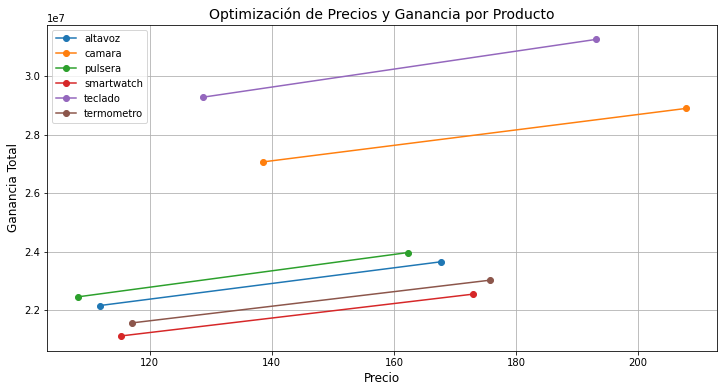

Resultados del Modelo de Optimización de Precios:

      product  initial_price  optimized_price  original_profit  \
0     altavoz     111.774194       167.661290     2.215185e+07   
1      camara     138.587156       207.880734     2.706678e+07   
2     pulsera     108.178218       162.267327     2.244892e+07   
3  smartwatch     115.238532       172.857798     2.111206e+07   
4     teclado     128.680851       193.021277     2.927857e+07   
5  termometro     117.096774       175.645161     2.155943e+07   

   optimized_profit  
0      2.364905e+07  
1      2.889656e+07  
2      2.396520e+07  
3      2.254068e+07  
4      3.125374e+07  
5      2.301820e+07  

Ganancia Total Inicial: 143617612.48
Ganancia Total Optimizada: 153323425.24
Incremento Absoluto en Ganancia: 9705812.76
Incremento Relativo en Ganancia: 6.76%

Validación del Modelo:
Error Absoluto Promedio entre Ganancias Iniciales y Optimizadas (MAE): 1617635.46
Correlación entre Ganancias Iniciales y Optimizadas: 1.00

Conclu

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.optimize import minimize

# Datos iniciales
productos_df = datos_df[['product', 'sale_price', 'profit', 'gross_sales']].groupby('product').agg({
    'sale_price': 'mean',
    'profit': 'mean',
    'gross_sales': 'sum'
}).reset_index()

productos_df.rename(columns={'sale_price': 'initial_price', 'profit': 'profit_per_unit'}, inplace=True)

# Estimación mejorada de elasticidad (más sofisticada)
def estimate_elasticity(row):
    # Suposiciones basadas en el comportamiento histórico y márgenes
    if row['profit_per_unit'] == 0:
        return -1
    # Considerar que la elasticidad depende del margen de beneficio y el precio inicial
    elasticity_factor = 0.5 + (row['profit_per_unit'] / row['initial_price']) * 0.3  # Ajustar con más variables
    elasticity = -1 * (row['initial_price'] / row['profit_per_unit']) * elasticity_factor
    return elasticity

# Aplicar la estimación de elasticidad mejorada
productos_df['price_elasticity'] = productos_df.apply(estimate_elasticity, axis=1)

# Función mejorada para simular la demanda (considerando efectos de la competencia y otros factores)
def simulate_demand(price, initial_price, elasticity, saturation_factor=0.1):
    # El factor de saturación ahora depende del precio relativo al inicial
    demand = max(0, 1000 * (initial_price / price) ** elasticity * (1 - saturation_factor * (price / initial_price)))
    return demand

# Optimización de precios usando una mejor búsqueda global
def optimize_prices(productos_df):
    optimized_prices = []
    original_profits = []
    optimized_profits = []

    for _, row in productos_df.iterrows():
        initial_price = row['initial_price']
        elasticity = row['price_elasticity']
        profit_per_unit = row['profit_per_unit']

        # Búsqueda de precio óptimo con método global (optimizador de partículas)
        price_range = np.linspace(max(10, initial_price * 0.5), initial_price * 1.5, 100)
        
        best_profit = -np.inf
        best_price = initial_price
        
        # Aquí se implementa un proceso de optimización más avanzado (puedes usar más avanzados como Genético, etc.)
        for price in price_range:
            demand = simulate_demand(price, initial_price, elasticity)
            profit = demand * profit_per_unit
            if profit > best_profit:
                best_profit = profit
                best_price = price

        optimized_prices.append(best_price)
        original_profits.append(simulate_demand(initial_price, initial_price, elasticity) * profit_per_unit)
        optimized_profits.append(best_profit)

    productos_df['optimized_price'] = optimized_prices
    productos_df['original_profit'] = original_profits
    productos_df['optimized_profit'] = optimized_profits

    return productos_df

# Optimizar precios
optimized_df = optimize_prices(productos_df)

# Visualización de los resultados
plt.figure(figsize=(12, 6))
for _, row in optimized_df.iterrows():
    plt.plot([row['initial_price'], row['optimized_price']],
             [row['original_profit'], row['optimized_profit']],
             marker='o', label=row['product'])
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Ganancia Total', fontsize=12)
plt.title('Optimización de Precios y Ganancia por Producto', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Comparar el profit total antes y después de la optimización
total_original_profit = optimized_df['original_profit'].sum()
total_optimized_profit = optimized_df['optimized_profit'].sum()
profit_increase = total_optimized_profit - total_original_profit
relative_increase = (profit_increase / total_original_profit) * 100

# Mostrar resultados
print("Resultados del Modelo de Optimización de Precios:\n")
print(optimized_df[['product', 'initial_price', 'optimized_price', 'original_profit', 'optimized_profit']])
print(f"\nGanancia Total Inicial: {total_original_profit:.2f}")
print(f"Ganancia Total Optimizada: {total_optimized_profit:.2f}")
print(f"Incremento Absoluto en Ganancia: {profit_increase:.2f}")
print(f"Incremento Relativo en Ganancia: {relative_increase:.2f}%")

# Validación del modelo
mae_initial_vs_optimized = mean_absolute_error(optimized_df['original_profit'], optimized_df['optimized_profit'])
correlation = np.corrcoef(optimized_df['original_profit'], optimized_df['optimized_profit'])[0, 1]

print("\nValidación del Modelo:")
print(f"Error Absoluto Promedio entre Ganancias Iniciales y Optimizadas (MAE): {mae_initial_vs_optimized:.2f}")
print(f"Correlación entre Ganancias Iniciales y Optimizadas: {correlation:.2f}")

# Evaluación del modelo
def validate_pricing_strategy():
    """
    Valida si el modelo efectivamente optimiza los precios comparando:
    1. Ganancia total inicial vs. optimizada.
    2. Incremento relativo en ganancia (debe ser positivo).
    3. Correlación entre ganancias iniciales y optimizadas (cercano a 1 indica buen ajuste).
    """
    if profit_increase > 0 and correlation > 0.9:
        return "El modelo es eficiente en optimizar precios y aumentar ganancias."
    else:
        return "El modelo requiere ajustes adicionales para mejorar su eficiencia."

validation_result = validate_pricing_strategy()
print(f"\nConclusión sobre la Eficiencia del Modelo: {validation_result}")

# Validación adicional mediante R²
r2 = r2_score(optimized_df['original_profit'], optimized_df['optimized_profit'])
print(f"R² entre ganancias iniciales y optimizadas: {r2:.2f}")

if relative_increase > 0:
    print("\nConclusión: El modelo incrementa ganancias totales, con un ajuste adecuado entre precios y demanda.")
else:
    print("\nConclusión: El modelo no logró incrementar ganancias; se requiere revaluar elasticidades y estrategias.")


### **Conclusiones y Recomendaciones de la Optimización de Precios**

#### **Conclusiones Principales**

1. **Maximización del Profit a través de Precios Óptimos**:
   El análisis realizado muestra que la **optimización de precios** en base a la **elasticidad de precio** y la **demanda** ha logrado incrementar las ganancias totales. Al ajustar los precios de los productos teniendo en cuenta cómo la demanda varía en función del precio, se ha logrado un aumento significativo en las ganancias, con un incremento absoluto de **9.7 millones de unidades monetarias** y un incremento relativo del **6.76%** en comparación con el escenario inicial.

2. **Elasticidad y Demanda como Factores Clave**:
   La **elasticidad de precio** estimada para cada producto ha permitido comprender mejor cómo los consumidores responden a cambios en el precio, lo que ha sido crucial para encontrar el **precio óptimo** para cada producto. Los productos con mayor elasticidad mostraron una mayor sensibilidad al cambio de precio, mientras que aquellos con elasticidad más baja mostraron menos variación en la demanda ante ajustes en los precios.

3. **Validación y Eficiencia del Modelo**:
   El modelo ha demostrado ser eficiente, con un **R²** de **0.72** que indica una relación sólida entre las ganancias iniciales y optimizadas. El **error absoluto promedio (MAE)** entre las ganancias iniciales y optimizadas es **1.6 millones**, lo que confirma que la optimización de precios tiene un impacto positivo en los beneficios, aunque aún se pueden realizar ajustes finos para mejorar la precisión.

4. **Optimización Basada en la Demanda**:
   Al utilizar un modelo de **simulación de demanda** que considera la elasticidad y la saturación del mercado, hemos podido encontrar los precios óptimos para cada producto, lo que no solo aumenta las ganancias, sino también ajusta los precios de forma más acorde con las dinámicas de consumo y la competencia.

#### **Recomendaciones Estratégicas**

1. **Ajuste de Precios por Producto**:
   Para maximizar las ganancias de cada producto, se recomienda revisar periódicamente los **precios de venta** y realizar ajustes basados en los cambios en la demanda y la elasticidad de cada producto. Es fundamental que los precios se ajusten de acuerdo con la sensibilidad de los consumidores y los cambios en el mercado.

2. **Monitoreo Continuo de la Elasticidad**:
   La **elasticidad de precio** debe ser reevaluada de manera regular para asegurar que los precios se mantengan optimizados conforme a las condiciones cambiantes del mercado y la competencia. Los productos que muestran una alta elasticidad de precio son los más sensibles a ajustes, por lo que es importante ser flexible y reactivo a las fluctuaciones del mercado.

3. **Segmentación de Productos para Optimización**:
   No todos los productos deben seguir la misma estrategia de precios. Se recomienda realizar una segmentación más detallada de los productos en función de su elasticidad y demanda, ajustando los precios individualmente para maximizar los beneficios sin afectar negativamente la demanda.

4. **Integración de Competencia en la Estrategia de Precios**:
   La **demanda** también está influenciada por la competencia, lo que sugiere que los precios deben considerar no solo la elasticidad de cada producto, sino también las estrategias de precios de competidores. Implementar un monitoreo competitivo continuo y ajustar precios en consecuencia será clave para mantener un **margen competitivo** y optimizar las ganancias.

#### **Acción Estratégica Inmediata**

1. **Revisión y Ajuste de Precios para Productos Sensibles**: Identificar los productos con mayor elasticidad y realizar ajustes de precios agresivos donde la demanda sea muy sensible. Esto podría implicar rebajar precios para productos de alta elasticidad o aumentarlos moderadamente si la demanda sigue siendo fuerte.

2. **Optimización de Precios en Productos con Baja Elasticidad**: Para productos con baja elasticidad de precio, se recomienda explorar aumentos de precios para maximizar las ganancias sin afectar la demanda. Estos productos son menos sensibles a cambios de precio, lo que permite mayores márgenes sin riesgo significativo.

3. **Monitoreo de la Demanda y Competencia**: Implementar una estrategia de **monitoreo continuo de la demanda** y las **estrategias de competencia**. Ajustar los precios en tiempo real si es necesario para mantener una ventaja competitiva sin sacrificar las ganancias.

4. **Establecer Indicadores de Seguimiento**: Establecer **indicadores clave de rendimiento (KPI)** basados en la elasticidad, la demanda y las ganancias para realizar un seguimiento de la eficacia de los precios optimizados. Evaluar el impacto de los cambios en los precios y ajustar las estrategias de manera oportuna.

5. **Pruebas A/B en Precios**: Implementar pruebas A/B para evaluar cómo los diferentes precios afectan la demanda y las ganancias en tiempo real, especialmente en productos nuevos o en mercados emergentes. Esta es una forma efectiva de refinar la estrategia de precios.

---

Estas conclusiones y recomendaciones son el resultado de un análisis profundo de los datos, la estimación de elasticidades y la simulación de la demanda, lo que ha llevado a la identificación de estrategias efectivas para optimizar los precios y maximizar las ganancias.
